# CH07 선형 모델: 리스크 팩터에서 수익률 예측까지


선형 모델은 가장 유용한 가설 클래스 중 하나를 나타낸다.    
이후 수많은 확장이 선형회귀 모델과 최소 자승법(OLS)을 적용해 파라미터를 학습시켰다.
- 일반화 선형 모델(GLM): 정규 분포 이외의 오차 분포를 암시하는 반응 변수를 허용함으로써 적용의 범위를 확장했다.
- 강건한 추정방법(robust estimation method): 시간에 따른 상관관계나 관측치 간 상관관계로 인해 데이터가 기준 가정을 위반하는 경우 통계적 추론이 가능하다.    
- 수축 방법(shrinkage method): 선형 모델의 예측 성과를 향상시키는 것을 목표로 한다.

> 분류에는 방향성 가격 예측이 포함된다.

7장에서 다루는 내용
- 선형 회귀 분석의 원리와 가정은 무엇인가?
- 선형 회귀 모델 훈련과 진단은 어떻게 하는가?
- 선형 회귀 분석을 사용해 주식 수익률은 어떻게 예측하는가?
- 규제화를 사용해 예측 성과를 어떻게 개선하는가?
- 로지스틱 회귀 분석의 작동 원리는 무엇인가?
- 회귀 분석을 분류 문제로 어떻게 변환시키는가?



## 추론에서 예측까지
표본으로부터 추정된 회귀 모수에 근거해 모집단의 실제 선형 관계에 대한 통계적 결론을 이끌어 내려면 오차의 통계적 특성에 관한 가정을 추가해야 한다.  
- 오차 분포가 관측치 전체에서 동일하다.
- 오차는 서로 독립적이다.
> **독립적이고 동일하게 분포**된 오차의 가정은 공분산 행렬이 오차 분산을 나타내는 상수를 곱한 **항등 행렬**임을 의미한다.    
→ 최소 자승법(OLS method)이 편향이 없고, 효율적인 추정치를 제공하는 것을 보장하며, 가장 낮은 표본 오차를 달성한다는 것을 의미한다.

수축 방법은 선형 목적 함수에 패널티 항을 추가하는 규제화를 적용해 모델 복잡성을 감소시킨다.    
- 패널티는 계수의 절대적 크기의 양(+)의 관련성이 있어 이러한 계수는 기준 사례에 비례해 수축된다.


## 베이스라인 모델: 다중 선형 회귀 모델


### 모델을 만드는 방법

다중 회귀 모델은 하나의 연속 결과 변수와 어떤 유형이든 가능하지만 전처리가 필요한 입력 변수 p 사이의 선형 함수 관계로 정의된다.

$y = f(x) + ϵ
\\y = β₀ + β₁x₁ + β₂x₂ + ... + βₚxₚ + ϵ
\\y = β₀ + \sum_{j=1}^p β_jx_j + ϵ$

- y는 종속 변수(출력)입니다.
- x₁, x₂, ..., xₚ는 독립 변수(입력)입니다.
- β₀, β₁, β₂, ..., βₚ는 회귀 계수입니다.
- ϵ는 오차 항입니다.

위의 수식은 입력 벡터 X^T=(x₁, ..., xₚ)와 회귀 계수 벡터 β=(β₀, β₁, β₂, ..., βₚ)를 내적한 결과에 오차 항 ϵ를 더한 형태로 표현됩니다.

### 모델을 훈련하는 방법
데이터에서 모델 파라미터(모델 모수)를 학습할 때 사용할 수 있는 방법
- 최소 자승법(OLS)
- 최대 우도 추정(MLE)
- 확률적 경사 하강법(SGD)

#### 최소 자승법: 초평면을 데이터에 맞추는 방법
- 최소 자승법 (Ordinary Least Squares, OLS):
     OLS는 주어진 데이터에 대해 잔차(오차)의 제곱합을 최소화하여 모델 파라미터를 추정하는 방법입니다.

     ![OLS Formula](https://latex.codecogs.com/png.latex?%5Cinline%20%5Cmin_%7B%5Cbeta%7D%20%5Csum_%7Bi%3D1%7D%5En%20%28y_i%20-%20%5Cmathbf%7BX%7D_i%5E%7BT%7D%20%5Cbeta%29%5E2)

     여기서,
     - ![OLS Formula - yi](https://latex.codecogs.com/png.latex?%5Cinline%20y_i)는 관측된 종속 변수 값입니다.
     - ![OLS Formula - Xi](https://latex.codecogs.com/png.latex?%5Cinline%20%5Cmathbf%7BX%7D_i%5E%7BT%7D)는 i번째 데이터 포인트의 독립 변수 벡터입니다.
     - ![OLS Formula - beta](https://latex.codecogs.com/png.latex?%5Cinline%20%5Cbeta)는 추정하려는 회귀 계수(모델 파라미터) 벡터입니다.
     - ![OLS Formula - n](https://latex.codecogs.com/png.latex?%5Cinline%20n)은 데이터 포인트의 총 개수입니다.

OLS는 잔차(오차)의 제곱합을 최소화하여 모델 파라미터를 추정하는 기법입니다. 목표는 관측된 종속 변수 값과 예측 값의 차이(잔차)를 최소화하는 최적의 회귀 계수를 찾는 것입니다. OLS는 행렬 연산을 사용하여 정규 방정식을 풀어 추정된 회귀 계수를 구할 수 있습니다.


#### 최대 우도 추정
- 최대 우도 추정 (Maximum Likelihood Estimation, MLE):
     MLE는 주어진 데이터에서 관측된 종속 변수의 확률 분포 모수를 추정하는 방법 중 하나입니다.

     ![MLE Formula](https://latex.codecogs.com/png.latex?%5Cinline%20%5Cmax_%7B%5Ctheta%7D%20%5Cprod_%7Bi%3D1%7D%5En%20f%28y_i%20%7C%20%5Cmathbf%7BX%7D_i%3B%20%5Ctheta%29)

     여기서,
     - ![MLE Formula - yi](https://latex.codecogs.com/png.latex?%5Cinline%20y_i)는 관측된 종속 변수 값입니다.
     - ![MLE Formula - Xi](https://latex.codecogs.com/png.latex?%5Cinline%20%5Cmathbf%7BX%7D_i)는 i번째 데이터 포인트의 독립 변수 값들을 포함한 벡터입니다.
     - ![MLE Formula - theta](https://latex.codecogs.com/png.latex?%5Cinline%20%5Ctheta)는 추정하려는 모델 파라미터(모수) 벡터입니다.
     - ![MLE Formula - n](https://latex.codecogs.com/png.latex?%5Cinline%20n)은 데이터 포인트의 총 개수입니다.
     - ![MLE Formula - f(yi | Xi; theta)](https://latex.codecogs.com/png.latex?%5Cinline%20f%28y_i%20%7C%20%5Cmathbf%7BX%7D_i%3B%20%5Ctheta%29)는 주어진 모델 파라미터(모수) ![MLE Formula - theta](https://latex.codecogs.com/png.latex?%5Cinline%20%5Ctheta) 아래에서 관측된 종속 변수 ![MLE Formula - yi](https://latex.codecogs.com/png.latex?%5Cinline%20y_i)의 확률 분포를 나타내는 함수입니다.

MLE는 관측된 데이터를 가장 잘 설명하는 모델 파라미터(모수)를 추정하는 방법입니다. 주어진 데이터에서 관측된 종속 변수의 확률 분포를 모델링하고, 주어진 모델 파라미터 아래에서 관측된 종속 변수의 확률을 최대화하는 파라미터 값을 찾습니다. 이때, 데이터가 독립적으로 추출되었다고 가정합니다. 최적화 알고리즘을 사용하여 MLE를 수행할 수 있습니다.


#### 경사하강법
- 확률적 경사 하강법 (Stochastic Gradient Descent, SGD)
     SGD는 데이터 세트의 한 데이터 포인트를 사용하여 모델 파라미터를 업데이트하는 반복적인 최적화 알고리즘입니다.

     ![SGD Formula](https://latex.codecogs.com/png.latex?%5Cinline%20%5Cbeta%20%5Cleftarrow%20%5Cbeta%20-%20%5Calpha%20%5Cnabla%20%28y_i%20-%20%5Cmathbf%7BX%7D_i%5E%7BT%7D%20%5Cbeta%29%5E2)

     여기서,
     - ![SGD Formula - yi](https://latex.codecogs.com/png.latex?%5Cinline%20y_i)는 관측된 종속 변수 값입니다.
     - ![SGD Formula - Xi](https://latex.codecogs.com/png.latex?%5Cinline%20%5Cmathbf%7BX%7D_i%5E%7BT%7D)는 i번째 데이터 포인트의 독립 변수 벡터입니다.
     - ![SGD Formula - beta](https://latex.codecogs.com/png.latex?%5Cinline%20%5Cbeta)는 업데이트되는 회귀 계수(모델 파라미터) 벡터입니다.
     - ![SGD Formula - alpha](https://latex.codecogs.com/png.latex?%5Cinline%20%5Calpha)는 학습률(learning rate)로, 각 업데이트에서의 보정 정도를 조절하는 하이퍼파라미터입니다.
     - ![SGD Formula - nabla](https://latex.codecogs.com/png.latex?%5Cinline%20%5Cnabla)는 손실 함수(여기서는 잔차의 제곱)에 대한 기울기(gradient) 연산을 나타냅니다.

SGD는 각 반복 단계에서 하나의 데이터 포인트를 사용하여 모델 파라미터를 업데이트하는 방법입니다. 잔차의 제곱을 최소화하기 위해 손실 함수의 기울기를 계산하고, 학습률을 곱하여 모델 파라미터를 업데이트합니다. 이 과정을 데이터 세트 전체에 대해 반복하면서 모델 파라미터를 조금씩 조정하여 최적의 파라미터 값을 찾습니다. SGD는 큰 데이터셋에서도 효과적으로 사용될 수 있으며, 온라인 학습(online learning)에 적합한 알고리즘입니다.


### 가우스-마르코프 정리
가우스-마르코프 정리(GMT)는 모델 파라미터 β의 불편 추정치를 생성하는 데 최소 자승법(OLS)이 필요한 가정과 이러한 추정치가 횡단면 데이터에 대해 모든 선형 모델 중에 가장 낮은 표준 오차를 갖는 경우를 정의한다.
- 모집단에서 선형성은 $y = β₀ + β₁x_x + β₂x_x + ... + β_kx_x + ϵ $ 상태를 유지한다. $β_i$는 알 수 없지만 상수이며, ϵ는 확률 오차다.  
- 입력 변수에 대한 데이터 $x_1, ..., x_k$는 모집단에서 추출한 확률 표본이다.
- 완전 공선성은 없다. 즉, 입력 변수 사이에 정확한 선형 관계는 없다.
- 오차 ϵ은 어떤 입력을 하더라도 0의 조건부 평균을 가진다. 즉, $E[ϵ_1, ..., x_k] = 0$이다.
- 등분산성, 오차 항 ϵ은 입력 변수에 따라 일정한 분산을 가진다. 즉 $E[ϵ_1, ..., x_k]=σ^2$이다.

### 통계적 추론을 수행하는 방법
- p-값: 검정 통계량에 대한 귀무가설을 공식화하고 가설이 정확하다는 가정하에 표본이 주어진 경우, 이 통계량에 대한 실제 값을 관찰할 확률

검정 통계량의 분포적 특징
- 파라미터 추정치는 다변량 정규 분포를 따른다. 즉, 다음과 같다.

    $$\hat{\beta} \sim \mathcal{N}(\beta, (X^TX)^{-1})σ$$
- GMT 1~5에서 모수 추정치는 이미 불편이고, 다음 식을 사용해 일정한 오차 분산을 갖는 불편 추정치를 얻을 수 있다.
   $$\hat{\sigma} = \frac{1}{N-p-1}∑_{i=2}^N (y_i-\hat{y}_i)^2$$
- 개별 계수 $β_j$에 대한 가설 검증의 t 통계량은 $ t_j = \frac{\hat{\beta}_j}{\hat{\sigma}\sqrt{v_j}} \sim t_{N-p-1}
$이며, 자유도 N-p-1을 가진 t 분포를 따른다. 여기서 $v_j$는 $(X^RX)^{-1}$의 대각행렬에서 j번째 요소다.
- t 분포는 정규 분포로 수렴되며 정규 분포의 97.5 분위수는 1.96이므로 모수 추정치의 95% 신뢰 구간에서 유용한 어림 법칙은 $\hat{\beta} \pm 2 \cdot \text{se}(\hat{\beta})
$이다. 0을 포함하는 구간은 실제 모수가 0이므로 모델과 관련 없다는 귀무가설을 기각할 수 없음을 의미한다.
- F 통계량은 전체 회귀가 유의한지 여부를 포함해 여러 모수에 대한 제한 검정을 허용한다. 추가 변수로 인한 RSS의 변화(감소)를 측정한다.
- 마지막으로 라그랑지 승수 검증은 다중 제약을 테스트하기 위한 F 검증의 대안이다.


### 문제를 진단하고 해결하는 방법
진단은 결과를 해석하고 통계적 추론을 수행할 때 모델의 가정을 검증하고 잘못된 결론을 방지한다.

#### 적합도
- 적합도 측도는 모델이 결과의 변동을 얼마나 잘 설명하는지 평가한다.
    - 결정 계수(R^2)
    - 아카이케 정보 기준(AIC)
    - 베이지안 정보 기준(BIC)

#### 이분산성
- 이분산성은 잔차 분산이 일정하지 않고 관측치에 걸쳐 다른 경우 발생한다.
- 잔차 분산이 입력 변수와 양(+)의 상관을 보일 경우, 즉 평균으로부터 거리가 먼 입력값에 대해 오차가 큰 경우 OLS 표준 오차 추정치는 너무 낮게 된다. 따라서 t 통계량은 부풀려져 실제로 존재하지 않는 관계에 대한 잘못된 발견이 이어지게 된다.
- 임의로 추정되는 잔차의 체계적인 패턴은 오차가 다양한 대안에 대해 동질적이라는 귀무가설을 통계적으로 검증하는 것
    - 브로쉬-파간
    - 화이트 검증
- 이분산성에 대한 OLS 추정치를 정정하는 방법
    - 조정된 표준 오차(=화이트 표준 오차): 소위 샌드위치 추정치를 사용해 오차 분산을 계산할 때 이분산성을 고려한다.
    - 클러스터링된 표준 오차: 데이터가 동질적으로 구별되는 그룹에 있다고 가정하지만 오차 분산은 그룹마다 다르다.
- OLS에 대한 대안: 서로 다른 가정을 사용해 오차 공분산 행렬을 추정한다.
    - 가중 최소 자승법(WLS): 공분산 행렬이 OLS와 같이 대각선 항목만 포함하는 이분산 오차의 경우 이제 항목이 변경될 수 있다.
    - 달성 가능한 일반화 최소 자승법(GLSAR): 자기 회귀 AR(p) 과정을 따르는 자기상관된 오차에 대해 사용
    - 일반화 최소 자승법(GLS): 임의 공분산 행렬 구조의 경우 이분산성이나 계열 상관이 존재하는 경우에 효율적이고 불편성이 없는, 즉 치우치지 않은 추정치를 산출


#### 계열 상관
- 계열 상관(Serial correlation)은 선형 회귀 분석으로 생성된 연속적인 잔차에 상관관계가 있다는 것을 의미하며, 네 번째 GMT 가정을 위반한다.
- 양(+)의 계열 상관은 표준오차가 과소 추정되고 t 통계량이 부풀려져 무시될 경우 잘못된 발견으로 이어진다.
- 표준 오차를 계산할 때 계열 상관을 정확하게 교정하는 절차
    - 더빈-왓슨 통계: 계열 상관을 진단한다.

#### 다중 공선성
- 다중 공선성(multicollinearity)은 두 개 이상의 독립 변수가 높은 상관관계를 가질 때 발생한다.
- 문제
    - 종속 변수에 영향을 미치는 팩터를 결정하기 어렵게 한다.
    - 개별 p-값은 오인의 여지가 있다. 실제 변수가 중요하더라도 p-값은 높을 수 있다.
    - 회귀 계수에 대한 신뢰 구간은 0을 포함하더라도 지나치게 과도해질 수 있으므로 결과에 대한 독립 변수의 영향을 결정하는 데 복잡하다.

- 다중 공선성을 교정하는 공식이나 이론적 해결책은 없으며, 하나 이상의 상관된 입력 변수를 제거하거나 표본 크기를 증가시키는 방법이 있다.

## 실제로 선형 회귀를 실행하는 방법
- 01_linear_regression_intro.ipynb

## Linear Regression - Introduction

Linear regression relates a continuous response (dependent) variable to one or more predictors (features, independent variables), using the assumption that the relationship is linear in nature:
- The relationship between each feature and the response is a straight line when we keep other features constant.
- The slope of this line does not depend on the values of the other variables.
- The effects of each variable on the response are additive (but we can include new variables that represent the interaction of two variables).

In other words, the model assumes that the response variable can be explained or predicted by a linear combination of the features, except for random deviations from this linear relationship.

## Imports & Settings

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
%matplotlib inline

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler

In [3]:
sns.set_style('whitegrid')
pd.options.display.float_format = '{:,.2f}'.format

### Simple Regression

#### Generate random data

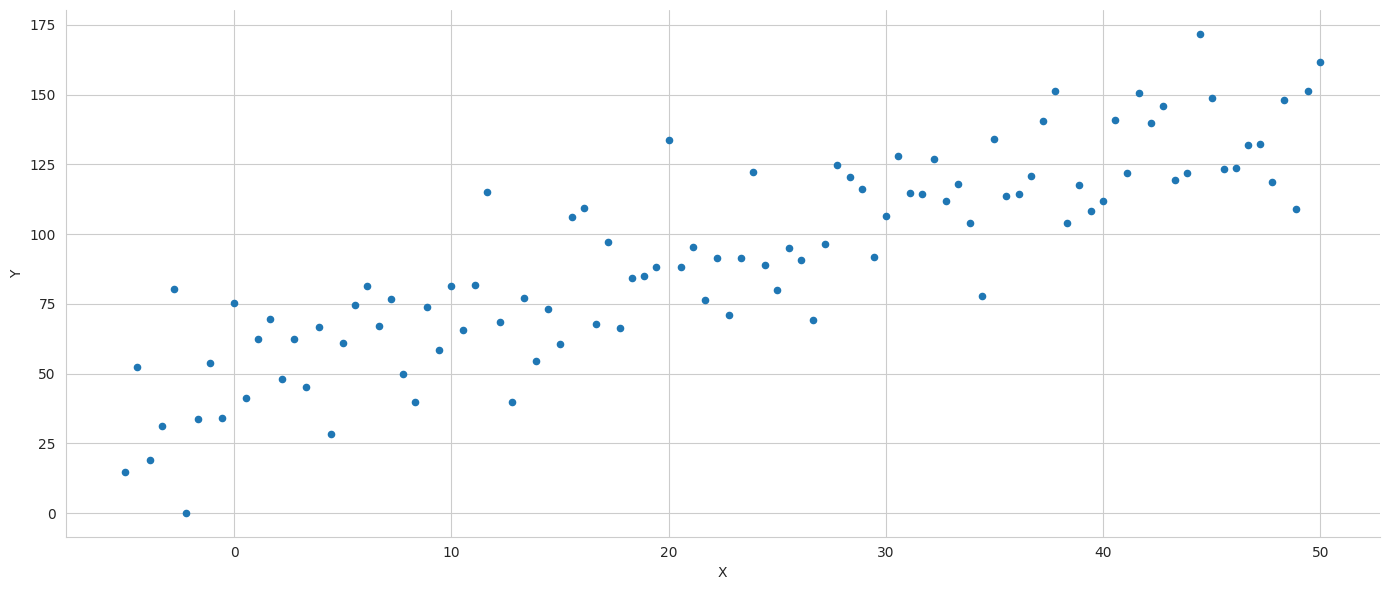

In [4]:
x = np.linspace(-5, 50, 100)
y = 50 + 2 * x + np.random.normal(0, 20, size=len(x))
data = pd.DataFrame({'X': x, 'Y': y})
ax = data.plot.scatter(x='X', y='Y', figsize=(14, 6))
sns.despine()
plt.tight_layout()

Our linear model with a single independent variable on the left-hand side assumes the following form:

$$y = \beta_0 + \beta_1 X_1 + \epsilon$$

$\epsilon$ accounts for the deviations or errors that we will encounter when our data do not actually fit a straight line. When $\epsilon$ materializes, that is when we run the model of this type on actual data, the errors are called **residuals**.

#### Estimate a simple regression with statsmodels

The upper part of the summary displays the dataset characteristics, namely the estimation method, the number of observations and parameters, and indicates that standard error estimates do not account for heteroskedasticity.

The middle panel shows the coefficient values that closely reflect the artificial data generating process. We can confirm that the estimates displayed in the middle of the summary result can be obtained using the OLS formula derived previously:

In [5]:
X = sm.add_constant(data['X'])
model = sm.OLS(data['Y'], X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.752
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     296.6
Date:                Sat, 24 Jun 2023   Prob (F-statistic):           2.11e-31
Time:                        15:44:21   Log-Likelihood:                -430.12
No. Observations:                 100   AIC:                             864.2
Df Residuals:                      98   BIC:                             869.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         48.9314      3.107     15.747      0.0

#### Verify calculation

In [6]:
beta = np.linalg.inv(X.T.dot(X)).dot(X.T.dot(y))
pd.Series(beta, index=X.columns)

const   48.93
X        1.94
dtype: float64

#### Display model & residuals

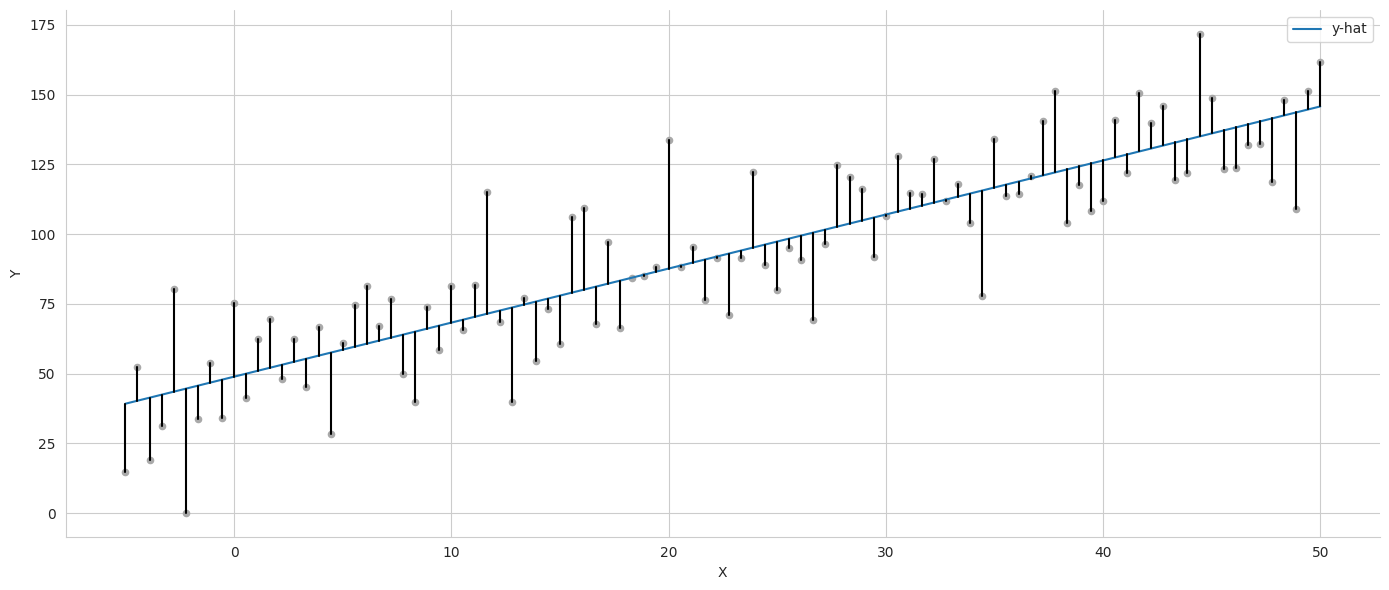

In [7]:
data['y-hat'] = model.predict()
data['residuals'] = model.resid
ax = data.plot.scatter(x='X', y='Y', c='darkgrey', figsize=(14,6))
data.plot.line(x='X', y='y-hat', ax=ax);
for _, row in data.iterrows():
    plt.plot((row.X, row.X), (row.Y, row['y-hat']), 'k-')
sns.despine()
plt.tight_layout();

### Multiple Regression


For two independent variables, the model simply changes as follows:

$$y = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + \epsilon$$

#### Generate new random data

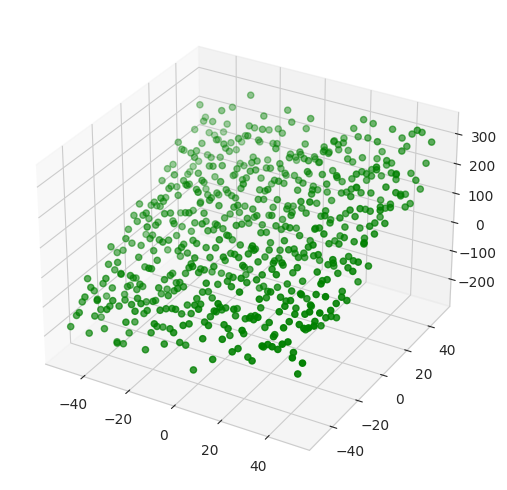

In [9]:
## Create data
size = 25
X_1, X_2 = np.meshgrid(np.linspace(-50, 50, size), np.linspace(-50, 50, size), indexing='ij')
data = pd.DataFrame({'X_1': X_1.ravel(), 'X_2': X_2.ravel()})
data['Y'] = 50 + data.X_1 + 3 * data.X_2 + np.random.normal(0, 50, size=size**2)

## Plot
three_dee = plt.figure(figsize=(15, 5)).add_subplot(projection='3d')
# ERROR SOLUTION: https://stackoverflow.com/questions/76047803/typeerror-figurebase-gca-got-an-unexpected-keyword-argument-projection
three_dee.scatter(data.X_1, data.X_2, data.Y, c='g')
sns.despine()
plt.tight_layout();

In [10]:
X = data[['X_1', 'X_2']]
y = data['Y']

#### Estimate multiple regression model with statsmodels

패널의 우측 상단에는 방금 논의한 적합도 지표와 함께 모든 계수가 0이고 관련이 없다는 가설을 기각하는 F-검정이 표시됩니다. 마찬가지로 t-통계량은 절편과 기울기 계수 모두가 당연히 매우 유의미함을 나타냅니다.

요약의 하단 부분에는 잔차 진단 결과가 표시됩니다. 좌측 패널은 정규성 가설을 검정하는 데 사용되는 비대칭도(skewness)와 첨도(kurtosis)를 표시합니다. Omnibus 테스트와 Jarque-Bera 테스트는 잔차가 정규분포를 따른다는 귀무가설을 기각하지 못합니다. Durbin-Watson 통계량은 잔차의 직렬 상관성을 검정하며, 2에 가까운 값은 2개의 매개변수와 625개의 관측치에 대한 직렬 상관성이 없다는 가설을 기각하지 못합니다.

마지막으로, 조건수는 다중공선성에 대한 증거를 제공합니다. 이는 입력 데이터를 포함하는 설계 행렬의 가장 큰 고유값과 가장 작은 고유값의 제곱근의 비율입니다. 30 이상의 값은 회귀분석에 중요한 다중공선성이 존재할 수 있다는 것을 나타냅니다.

In [11]:
X_ols = sm.add_constant(X)
model = sm.OLS(y, X_ols).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.796
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     1213.
Date:                Sat, 24 Jun 2023   Prob (F-statistic):          2.15e-215
Time:                        15:45:37   Log-Likelihood:                -3314.4
No. Observations:                 625   AIC:                             6635.
Df Residuals:                     622   BIC:                             6648.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         56.7089      1.950     29.086      0.0

#### Verify computation

In [12]:
beta = np.linalg.inv(X_ols.T.dot(X_ols)).dot(X_ols.T.dot(y))
pd.Series(beta, index=X_ols.columns)

const   56.71
X_1      1.08
X_2      3.01
dtype: float64

#### Save output as image

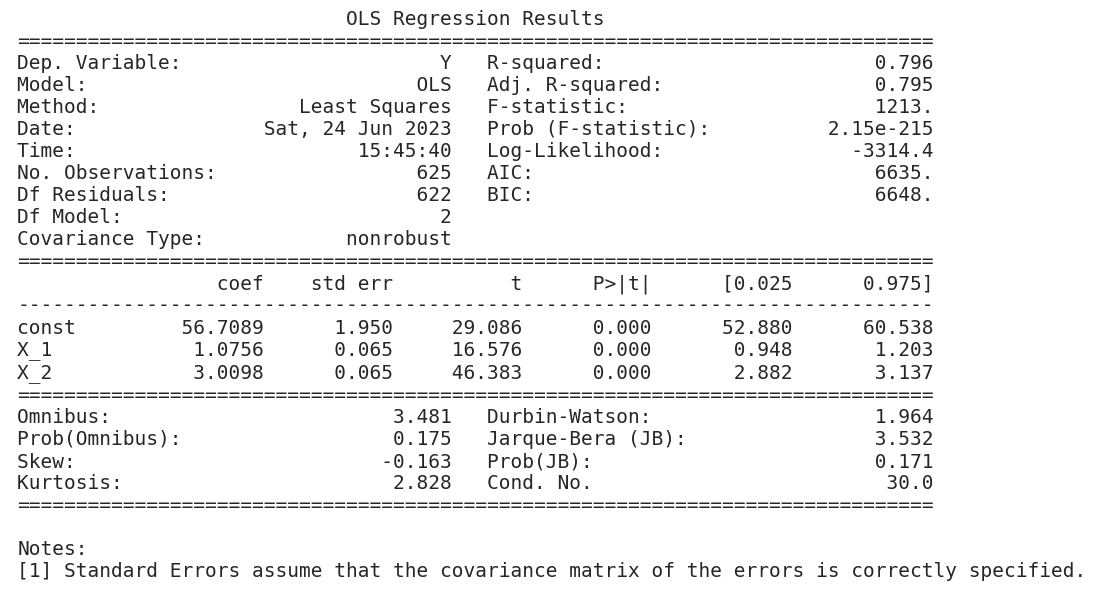

In [13]:
plt.rc('figure', figsize=(12, 7))
plt.text(0.01, 0.05, str(model.summary()), {'fontsize': 14}, fontproperties = 'monospace')
plt.axis('off')
plt.tight_layout()
plt.subplots_adjust(left=0.2, right=0.8, top=0.8, bottom=0.1)
# plt.savefig('multiple_regression_summary.png', bbox_inches='tight', dpi=300);

#### Display model & residuals

The following diagram illustrates the hyperplane fitted by the model to the randomly generated data points

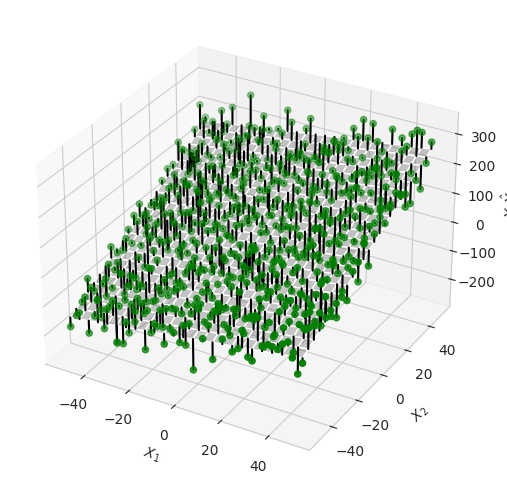

In [15]:
three_dee = plt.figure(figsize=(15, 5)).add_subplot(projection='3d')
three_dee.scatter(data.X_1, data.X_2, data.Y, c='g')
data['y-hat'] = model.predict()
to_plot = data.set_index(['X_1', 'X_2']).unstack().loc[:, 'y-hat']
three_dee.plot_surface(X_1, X_2, to_plot.values, color='black', alpha=0.2, linewidth=1, antialiased=True)
for _, row in data.iterrows():
    plt.plot((row.X_1, row.X_1), (row.X_2, row.X_2), (row.Y, row['y-hat']), 'k-');
three_dee.set_xlabel('$X_1$');three_dee.set_ylabel('$X_2$');three_dee.set_zlabel('$Y, \hat{Y}$')
sns.despine()
plt.tight_layout();

Additional [diagnostic tests](https://www.statsmodels.org/dev/diagnostic.html)

## Stochastic Gradient Descent Regression

The sklearn library includes an SGDRegressor model in its linear_models module. To learn the parameters for the same model using this method, we need to first standardize the data because the gradient is sensitive to the scale.

### Prepare data

The gradient is sensitive to scale and so is SGDRegressor. Use the `StandardScaler` or `scale` to adjust the features.

We use StandardScaler() for this purpose that computes the mean and the standard deviation for each input variable during the fit step, and then subtracts the mean and divides by the standard deviation during the transform step that we can conveniently conduct in a single fit_transform() command:

In [16]:
scaler = StandardScaler()
X_ = scaler.fit_transform(X)

### Configure SGDRegressor

Then we instantiate the SGDRegressor using the default values except for a random_state setting to facilitate replication:

In [19]:
sgd = SGDRegressor(loss='squared_error', # squared_loss -> squared_error
                   fit_intercept=True,
                   shuffle=True,
                   random_state=42,
                   learning_rate='invscaling',
                   eta0=0.01,
                   power_t=0.25)

### Fit Model

Now we can fit the sgd model, create the in-sample predictions for both the OLS and the sgd models, and compute the root mean squared error for each:

In [20]:
# sgd.n_iter = np.ceil(10**6 / len(y))
sgd.fit(X=X_, y=y)

SGDRegressor(random_state=42)

As expected, both models yield the same result. We will now take on a more ambitious project using linear regression to estimate a multi-factor asset pricing model.

In [21]:
coeffs = (sgd.coef_ * scaler.scale_) + scaler.mean_
pd.Series(coeffs, index=X.columns)

X_1     969.73
X_2   2,714.32
dtype: float64

In [22]:
resids = pd.DataFrame({'sgd': y - sgd.predict(X_),
                      'ols': y - model.predict(sm.add_constant(X))})

In [23]:
resids.pow(2).sum().div(len(y)).pow(.5)

sgd   48.63
ols   48.62
dtype: float64

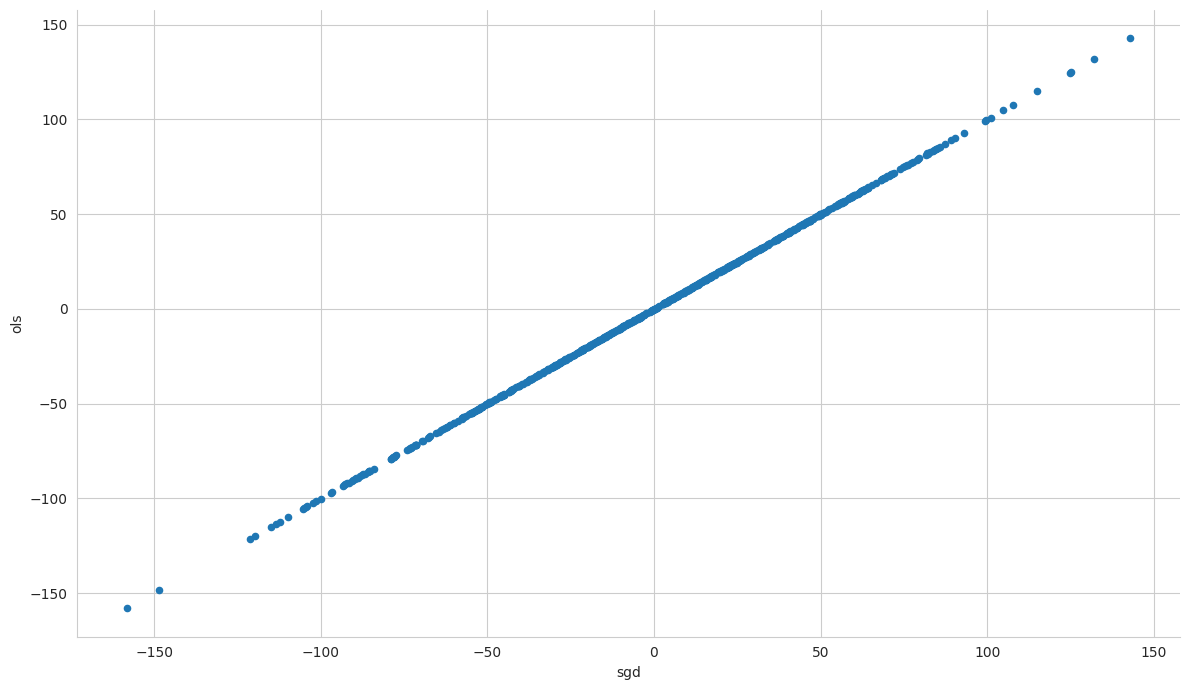

In [24]:
resids.plot.scatter(x='sgd', y='ols')
sns.despine()
plt.tight_layout();

## 선형 팩터 모델을 구축하는 방법
알고리듬 트레이딩 전략은 이러한 수익률의 주요 동인을 나타내는 리스크의 원천과 자산 수익률 간의 관계를 계량화하고자 팩터 모델을 사용한다.     
각 팩터 리스크는 프리미엄이 붙이며, 총 자산 수익률은 이러한 리스크 프리미엄의 가중 평균한 것으로 간주할 수 있다.   



### CAPM에서 파마-프렌치 5 팩터 모델까지
자본 자산 가격 결정 모델(CAPM)은 무위험 이자율 대비 전체 시장의 초과 기대 수익률인 단일 팩터에 대한 개별 익스포저를 사용해 모든 N개 자산의 기대 수익률을 설명한다.   
CAPM 모델은 다음과 같은 선형 형태를 취한다.
$$E[r_i]=\alpha_i+r_f+β_i(E[r_m]-r_f)$$


파마-프렌치 리스크 팩터는 주어진 리스크 팩터를 반영하는 메트릭에 따라 높은 값이나 낮은 값을 가진 다양한 포트폴리오에 대한 수익률 차이로 계산된다.
- 리스크 팩터와 관련된 메트릭
    - 시작 규모: 시장 지분(ME)
    - 가치: 주식의 장부 가치(BE_를 ME로 나눈 값
    - 영업 수익성(OP): 매출/자산 판매에서 비용을 뺀 금액
    - 투자: 투자/자산

- 02_fama_macbeth.ipynb

# How to build a linear factor model

Algorithmic trading strategies use linear factor models to quantify the relationship between the return of an asset and the sources of risk that represent the main drivers of these returns. Each factor risk carries a premium, and the total asset return can be expected to correspond to a weighted average of these risk premia.

There are several practical applications of factor models across the portfolio management process from construction and asset selection to risk management and performance evaluation. The importance of factor models continues to grow as common risk factors are now tradeable:

- A summary of the returns of many assets by a much smaller number of factors reduces the amount of data required to estimate the covariance matrix when optimizing a portfolio
- An estimate of the exposure of an asset or a portfolio to these factors allows for the management of the resultant risk, for instance by entering suitable hedges when risk factors are themselves traded
- A factor model also permits the assessment of the incremental signal content of new alpha factors
- A factor model can also help assess whether a manager's performance relative to a benchmark is indeed due to skill in selecting assets and timing the market, or if instead, the performance can be explained by portfolio tilts towards known return drivers that can today be replicated as low-cost, passively managed funds without incurring active management fees

## Imports & Settings

In [25]:
import warnings
warnings.filterwarnings('ignore')

In [27]:
!pip install linearmodels

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 20.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.4/82.4 kB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.8/43.8 kB 3.4 MB/s eta 0:00:00


In [28]:
import pandas as pd
import numpy as np

from statsmodels.api import OLS, add_constant
import pandas_datareader.data as web

from linearmodels.asset_pricing import LinearFactorModel

import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
sns.set_style('whitegrid')

## Get Data

Fama and French make updated risk factor and research portfolio data available through their [website](http://mba.tuck.dartmouth.edu/pages/faculty/ken.french/data_library.html), and you can use the `pandas_datareader` package to obtain the data.

### 리스크 팩터(Risk Factors) 입수

특히, 우리는 주식을 먼저 세 가지 크기 그룹으로 분류한 후 나머지 세 개의 기업 특정 요소에 대해 각각 두 개씩 분류하여 얻은 다섯 가지 Fama-French 요인을 사용할 것입니다.

따라서 이러한 요인은 크기와 시장가치비율, 크기와 영업이익성, 그리고 크기와 투자에 따라 형성된 세 개의 가중치 기반 포트폴리오 세트로 구성됩니다. 위표에서 설명한 대로 포트폴리오 (PF)의 평균 수익률로 계산된 리스크 요인 값이 됩니다.

| 레이블 | 이름                          | 설명                                                                                                                                      |
|-------|-------------------------------|--------------------------------------------------------------------------------------------------------------------------------------------|
| SMB   | Small Minus Big               | 아홉 개의 소형 주식 포트폴리오의 평균 수익률에서 아홉 개의 대형 주식 포트폴리오의 평균 수익률을 뺀 값                                                            |
| HML   | High Minus Low                | 두 개의 가치 포트폴리오의 평균 수익률에서 두 개의 성장 포트폴리오의 평균 수익률을 뺀 값                                                             |
| RMW   | Robust minus Weak             | 두 개의 견고한 영업이익성 포트폴리오의 평균 수익률에서 두 개의 약한 영업이익성 포트폴리오의 평균 수익률을 뺀 값                                              |
| CMA   | Conservative Minus Aggressive | 두 개의 보수적인 투자 포트폴리오의 평균 수익률에서 두 개의 공격적인 투자 포트폴리오의 평균 수익률을 뺀 값                                                  |
| Rm-Rf | 시장 초과 수익률              | 미국에 상장된 NYSE, AMEX, 또는 NASDAQ의 모든 기업에 대한 가중 평균 수익률에서 월 초에 '좋은' 데이터를 가진 t-1 개월 미국 국채 수익률을 뺀 값 |

위의 표에서는 다양한 개념과 리스크 팩터 계산 컬럼을 제공하고 있습니다.

파마-프렌치 5 요인은 크기와 시장가치비율을 기반으로 형성된 6개의 가중치 기반 포트폴리오, 크기와 영업이익성을 기반으로 형성된 6개의 가중치 기반 포트폴리오, 그리고 크기와 투자를 기반으로 형성된 6개의 가중치 기반 포트폴리오에 기반합니다.

We will use returns at a monthly frequency that we obtain for the period 2010 – 2017 as follows:

In [30]:
ff_factor = 'F-F_Research_Data_5_Factors_2x3'
ff_factor_data = web.DataReader(ff_factor, 'famafrench', start='2010', end='2017-12')[0]
ff_factor_data.info()

<class 'pandas.core.frame.DataFrame'>
PeriodIndex: 96 entries, 2010-01 to 2017-12
Freq: M
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Mkt-RF  96 non-null     float64
 1   SMB     96 non-null     float64
 2   HML     96 non-null     float64
 3   RMW     96 non-null     float64
 4   CMA     96 non-null     float64
 5   RF      96 non-null     float64
dtypes: float64(6)
memory usage: 5.2 KB


In [31]:
ff_factor_data.describe()

,Mkt-RF,SMB,HML,RMW,CMA,RF
count,96.00,96.00,96.00,96.00,96.00,96.00
mean,1.16,0.06,-0.05,0.13,0.05,0.01
std,3.58,2.30,2.20,1.58,1.41,0.02
min,-7.89,-4.58,-4.70,-3.88,-3.24,0.00
25%,-0.92,-1.67,-1.67,-1.08,-0.95,0.00
50%,1.23,0.20,-0.28,0.21,0.01,0.00
75%,3.20,1.58,1.21,1.23,0.93,0.01
max,11.35,7.04,8.19,3.48,3.69,0.09


### Portfolios

파마와 프렌치는 또한 요인 노출의 추정 및 특정 시간 기간에 시장에서 제공되는 리스크 프리미어의 가치를 설명할 수 있는 다양한 포트폴리오를 제공합니다. 우리는 월간 주파수로 17개 산업 포트폴리오의 패널 데이터를 사용할 것입니다.

요인 모형은 초과 수익률(excess returns)로 작동하므로 수익률에서 위험 없는 이자율을 차감할 것입니다.

In [32]:
ff_portfolio = '17_Industry_Portfolios'
ff_portfolio_data = web.DataReader(ff_portfolio, 'famafrench', start='2010', end='2017-12')[0]
ff_portfolio_data = ff_portfolio_data.sub(ff_factor_data.RF, axis=0)
ff_portfolio_data.info()

<class 'pandas.core.frame.DataFrame'>
PeriodIndex: 96 entries, 2010-01 to 2017-12
Freq: M
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Food    96 non-null     float64
 1   Mines   96 non-null     float64
 2   Oil     96 non-null     float64
 3   Clths   96 non-null     float64
 4   Durbl   96 non-null     float64
 5   Chems   96 non-null     float64
 6   Cnsum   96 non-null     float64
 7   Cnstr   96 non-null     float64
 8   Steel   96 non-null     float64
 9   FabPr   96 non-null     float64
 10  Machn   96 non-null     float64
 11  Cars    96 non-null     float64
 12  Trans   96 non-null     float64
 13  Utils   96 non-null     float64
 14  Rtail   96 non-null     float64
 15  Finan   96 non-null     float64
 16  Other   96 non-null     float64
dtypes: float64(17)
memory usage: 13.5 KB


In [33]:
ff_portfolio_data.describe()

,Food,Mines,Oil,Clths,Durbl,Chems,Cnsum,Cnstr,Steel,FabPr,Machn,Cars,Trans,Utils,Rtail,Finan,Other
count,96.00,96.00,96.00,96.00,96.00,96.00,96.00,96.00,96.00,96.00,96.00,96.00,96.00,96.00,96.00,96.00,96.00
mean,1.05,0.20,0.60,1.40,1.15,1.30,1.19,1.74,0.56,1.35,1.22,1.28,1.46,0.90,1.23,1.25,1.29
std,2.80,7.90,5.48,5.02,5.16,5.59,3.14,5.24,7.39,4.69,4.80,5.72,4.14,3.23,3.51,4.84,3.70
min,-5.17,-24.38,-11.68,-10.00,-13.16,-17.39,-7.15,-14.16,-20.49,-11.96,-9.07,-11.65,-8.56,-6.99,-9.18,-11.14,-7.89
25%,-0.79,-5.84,-3.12,-1.87,-2.10,-1.44,-0.85,-2.41,-4.39,-1.45,-2.06,-1.25,-0.81,-0.74,-0.95,-1.46,-1.09
50%,0.92,-0.44,0.98,1.16,1.23,1.44,1.46,2.17,0.66,1.48,1.52,0.64,1.48,1.24,0.86,1.91,1.66
75%,3.19,5.73,4.15,3.86,4.16,4.44,3.30,5.56,4.21,3.84,4.58,4.80,4.24,2.96,3.37,4.10,3.48
max,6.67,21.94,15.94,17.19,16.61,18.37,8.26,15.51,21.35,17.66,14.75,20.86,12.98,7.84,12.44,13.41,10.77


### Equity Data

In [34]:
from google.colab import drive
drive.mount('/content/drive') # 구글 드라이브를 사용하는 경우

Mounted at /content/drive


In [35]:
!unzip /content/drive/MyDrive/스터디/금융공학_퀀트_스터디/data/WIKI_PRICES.zip

Archive:  /content/drive/MyDrive/스터디/금융공학_퀀트_스터디/data/WIKI_PRICES.zip
  inflating: WIKI_PRICES_212b326a081eacca455e13140d7bb9db.csv  


In [36]:
!mv WIKI_PRICES_212b326a081eacca455e13140d7bb9db.csv wiki_prices.csv

In [43]:
DATA_STORE = 'assets.h5'

In [44]:
df = (pd.read_csv('wiki_prices.csv',
                 parse_dates=['date'],
                 index_col=['date', 'ticker'],
                 infer_datetime_format=True)
     .sort_index())

print(df.info(null_counts=True))
with pd.HDFStore(DATA_STORE) as store:
    store.put('quandl/wiki/prices', df)

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 15389314 entries, (Timestamp('1962-01-02 00:00:00'), 'ARNC') to (Timestamp('2018-03-27 00:00:00'), 'ZUMZ')
Data columns (total 12 columns):
 #   Column       Non-Null Count     Dtype  
---  ------       --------------     -----  
 0   open         15388776 non-null  float64
 1   high         15389259 non-null  float64
 2   low          15389259 non-null  float64
 3   close        15389313 non-null  float64
 4   volume       15389314 non-null  float64
 5   ex-dividend  15389314 non-null  float64
 6   split_ratio  15389313 non-null  float64
 7   adj_open     15388776 non-null  float64
 8   adj_high     15389259 non-null  float64
 9   adj_low      15389259 non-null  float64
 10  adj_close    15389313 non-null  float64
 11  adj_volume   15389314 non-null  float64
dtypes: float64(12)
memory usage: 1.4+ GB
None


In [45]:
df = pd.read_csv('https://raw.githubusercontent.com/FE-Quant-Study/Machine-Learning-for-Algorithmic-Trading-Second-Edition/master/data/us_equities_meta_data.csv')
df.info()
with pd.HDFStore(DATA_STORE) as store:
    store.put('us_equities/stocks', df.set_index('ticker'))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6834 entries, 0 to 6833
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ticker     6834 non-null   object 
 1   name       6834 non-null   object 
 2   lastsale   6718 non-null   float64
 3   marketcap  5766 non-null   float64
 4   ipoyear    3038 non-null   float64
 5   sector     5288 non-null   object 
 6   industry   5288 non-null   object 
dtypes: float64(3), object(4)
memory usage: 373.9+ KB


In [46]:
with pd.HDFStore('./assets.h5') as store:
    prices = store['/quandl/wiki/prices'].adj_close.unstack().loc['2010':'2017']
    equities = store['/us_equities/stocks'].drop_duplicates()

In [47]:
sectors = equities.filter(prices.columns, axis=0).sector.to_dict()
prices = prices.filter(sectors.keys()).dropna(how='all', axis=1)

In [48]:
returns = prices.resample('M').last().pct_change().mul(100).to_period('M')
returns = returns.dropna(how='all').dropna(axis=1)
returns.info()

<class 'pandas.core.frame.DataFrame'>
PeriodIndex: 95 entries, 2010-02 to 2017-12
Freq: M
Columns: 1986 entries, A to ZUMZ
dtypes: float64(1986)
memory usage: 1.4 MB


### Align data

In [49]:
ff_factor_data = ff_factor_data.loc[returns.index]
ff_portfolio_data = ff_portfolio_data.loc[returns.index]

In [50]:
ff_factor_data.describe()

,Mkt-RF,SMB,HML,RMW,CMA,RF
count,95.00,95.00,95.00,95.00,95.00,95.00
mean,1.21,0.06,-0.05,0.14,0.04,0.01
std,3.57,2.31,2.21,1.58,1.42,0.02
min,-7.89,-4.58,-4.70,-3.88,-3.24,0.00
25%,-0.56,-1.68,-1.67,-0.88,-0.96,0.00
50%,1.29,0.16,-0.31,0.27,0.01,0.00
75%,3.26,1.60,1.22,1.24,0.94,0.01
max,11.35,7.04,8.19,3.48,3.69,0.09


### Compute excess Returns

In [51]:
excess_returns = returns.sub(ff_factor_data.RF, axis=0)
excess_returns.info()

<class 'pandas.core.frame.DataFrame'>
PeriodIndex: 95 entries, 2010-02 to 2017-12
Freq: M
Columns: 1986 entries, A to ZUMZ
dtypes: float64(1986)
memory usage: 1.4 MB


In [52]:
excess_returns = excess_returns.clip(lower=np.percentile(excess_returns, 1),
                                     upper=np.percentile(excess_returns, 99))

## 파마-맥베스 회귀 분석(Fama-Macbeth Regression)

리스크 요인 및 포트폴리오 수익에 대한 데이터가 주어지면, 포트폴리오의 노출도를 추정하는 것이 유용합니다. 즉, 얼마나 리스크 요인이 포트폴리오 수익을 설명하는지, 또한 주어진 요인에 대한 노출의 가치는 얼마인지, 즉 시장의 리스크 요인 프리미엄은 얼마인지를 추정하는 것입니다. 그런 다음 리스크 프리미엄을 통해 요인 노출이 알려져 있거나 가정될 경우 어떤 포트폴리오의 수익을 추정할 수 있습니다.

In [53]:
ff_portfolio_data.info()

<class 'pandas.core.frame.DataFrame'>
PeriodIndex: 95 entries, 2010-02 to 2017-12
Freq: M
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Food    95 non-null     float64
 1   Mines   95 non-null     float64
 2   Oil     95 non-null     float64
 3   Clths   95 non-null     float64
 4   Durbl   95 non-null     float64
 5   Chems   95 non-null     float64
 6   Cnsum   95 non-null     float64
 7   Cnstr   95 non-null     float64
 8   Steel   95 non-null     float64
 9   FabPr   95 non-null     float64
 10  Machn   95 non-null     float64
 11  Cars    95 non-null     float64
 12  Trans   95 non-null     float64
 13  Utils   95 non-null     float64
 14  Rtail   95 non-null     float64
 15  Finan   95 non-null     float64
 16  Other   95 non-null     float64
dtypes: float64(17)
memory usage: 13.4 KB


In [54]:
ff_factor_data = ff_factor_data.drop('RF', axis=1)
ff_factor_data.info()

<class 'pandas.core.frame.DataFrame'>
PeriodIndex: 95 entries, 2010-02 to 2017-12
Freq: M
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Mkt-RF  95 non-null     float64
 1   SMB     95 non-null     float64
 2   HML     95 non-null     float64
 3   RMW     95 non-null     float64
 4   CMA     95 non-null     float64
dtypes: float64(5)
memory usage: 4.5 KB


상관관계로 인해 발생하는 추론 문제에 대응하기 위해, 파마와 맥베스는 리스크 요인에 대한 수익률의 교차섹션 회귀분석을 위한 두 단계 방법론을 제안했습니다. 두 단계의 파마-맥베스 회귀분석은 시장에서 특정 리스크 요인에 노출된 경우에 보상되는 프리미엄을 추정하는 데 사용됩니다. 두 단계는 다음과 같습니다:

- 첫 번째 단계: 각 자산 또는 포트폴리오에 대해 N개의 시계열 회귀분석을 수행하여 해당 자산의 초과 수익률을 요인에 대한 로딩 계수를 추정합니다.

- 두 번째 단계: 각 시간 기간마다 T개의 교차섹션 회귀분석을 수행하여 리스크 프리미엄을 추정합니다.

자세한 내용은 [Machine Learning for Trading](https://www.amazon.com/Hands-Machine-Learning-Algorithmic-Trading-ebook/dp/B07JLFH7C5/ref=sr_1_2?ie=UTF8&qid=1548455634&sr=8-2&keywords=machine+learning+algorithmic+trading)의 7장에서 해당 섹션을 참조하십시오.

이제 우리는 시간 평균으로 요인 리스크 프리미엄을 계산하고, 그들의 개별적인 유의성을 평가하기 위해 t-통계량을 얻을 수 있습니다. 이 때, 리스크 프리미엄 추정치가 시간을 통해 독립적이라는 가정을 사용합니다.

만약 거래되는 리스크 요인에 대해 매우 크고 대표적인 데이터 샘플이 있다면, 우리는 리스크 프리미엄 추정치로 샘플 평균을 사용할 수 있을 것입니다. 그러나 보통 우리는 충분히 긴 기록을 가지지 않으며, 샘플 평균 주변의 오차 범위가 상당히 크게 될 수 있습니다.

파마-맥베스 방법론은 다른 자산과의 요인간 공분산을 활용하여 요인 프리미엄을 결정합니다. 자산 수익률의 두 번째 모멘트는 첫 번째 모멘트보다 쉽게 추정할 수 있으며, 더 세분화된 데이터를 얻는 것은 추정을 크게 개선시킬 수 있습니다. 이는 평균 추정에는 해당되지 않습니다.

### Step 1: Factor Exposures

We can implement the first stage to obtain the 17 factor loading estimates as follows:

In [55]:
betas = []
for industry in ff_portfolio_data:
    step1 = OLS(endog=ff_portfolio_data.loc[ff_factor_data.index, industry],
                exog=add_constant(ff_factor_data)).fit()
    betas.append(step1.params.drop('const'))

In [56]:
betas = pd.DataFrame(betas,
                     columns=ff_factor_data.columns,
                     index=ff_portfolio_data.columns)
betas.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17 entries, Food  to Other
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Mkt-RF  17 non-null     float64
 1   SMB     17 non-null     float64
 2   HML     17 non-null     float64
 3   RMW     17 non-null     float64
 4   CMA     17 non-null     float64
dtypes: float64(5)
memory usage: 1.3+ KB


### Step 2: Risk Premia

For the second stage, we run 96 regressions of the period returns for the cross section of portfolios on the factor loadings

In [57]:
lambdas = []
for period in ff_portfolio_data.index:
    step2 = OLS(endog=ff_portfolio_data.loc[period, betas.index],
                exog=betas).fit()
    lambdas.append(step2.params)

In [58]:
lambdas = pd.DataFrame(lambdas,
                       index=ff_portfolio_data.index,
                       columns=betas.columns.tolist())
lambdas.info()

<class 'pandas.core.frame.DataFrame'>
PeriodIndex: 95 entries, 2010-02 to 2017-12
Freq: M
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Mkt-RF  95 non-null     float64
 1   SMB     95 non-null     float64
 2   HML     95 non-null     float64
 3   RMW     95 non-null     float64
 4   CMA     95 non-null     float64
dtypes: float64(5)
memory usage: 6.5 KB


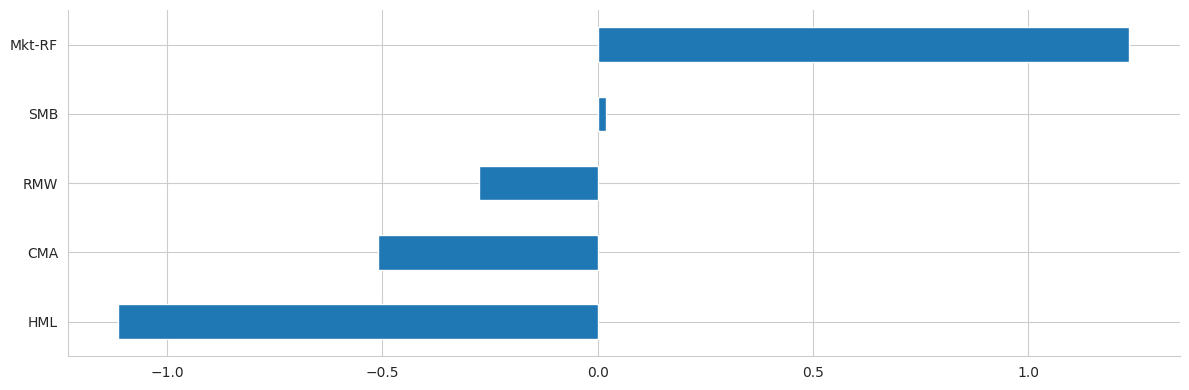

In [59]:
lambdas.mean().sort_values().plot.barh(figsize=(12, 4))
sns.despine()
plt.tight_layout();

In [60]:
t = lambdas.mean().div(lambdas.std())
t

Mkt-RF    0.34
SMB       0.01
HML      -0.27
RMW      -0.09
CMA      -0.15
dtype: float64

#### Results

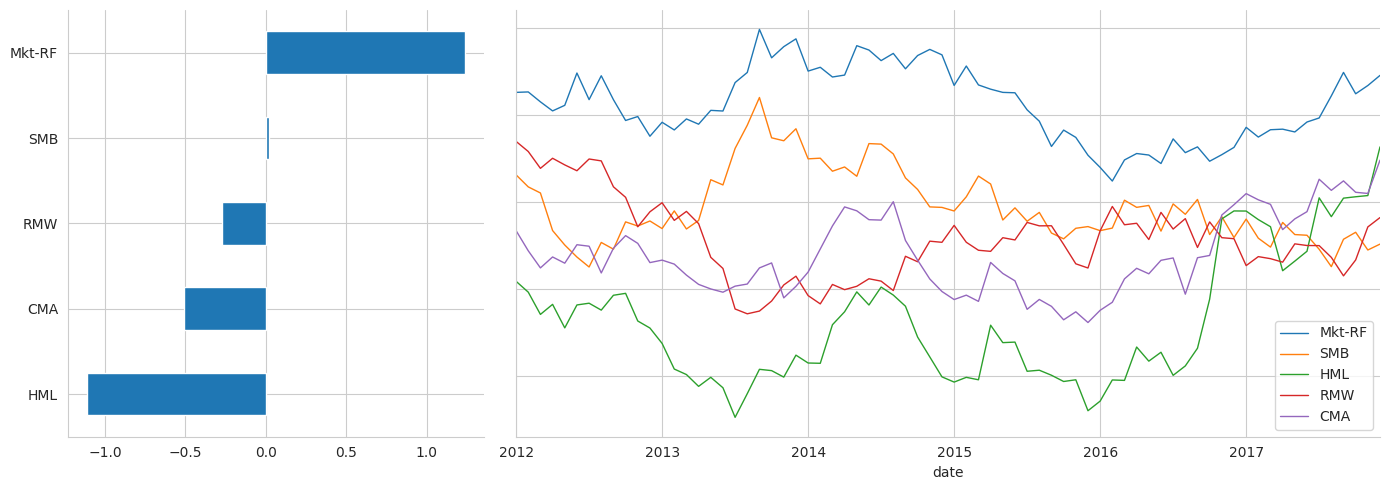

In [61]:
window = 24  # months
ax1 = plt.subplot2grid((1, 3), (0, 0))
ax2 = plt.subplot2grid((1, 3), (0, 1), colspan=2)
lambdas.mean().sort_values().plot.barh(ax=ax1)
lambdas.rolling(window).mean().dropna().plot(lw=1,
                                             figsize=(14, 5),
                                             sharey=True,
                                             ax=ax2)
sns.despine()
plt.tight_layout()

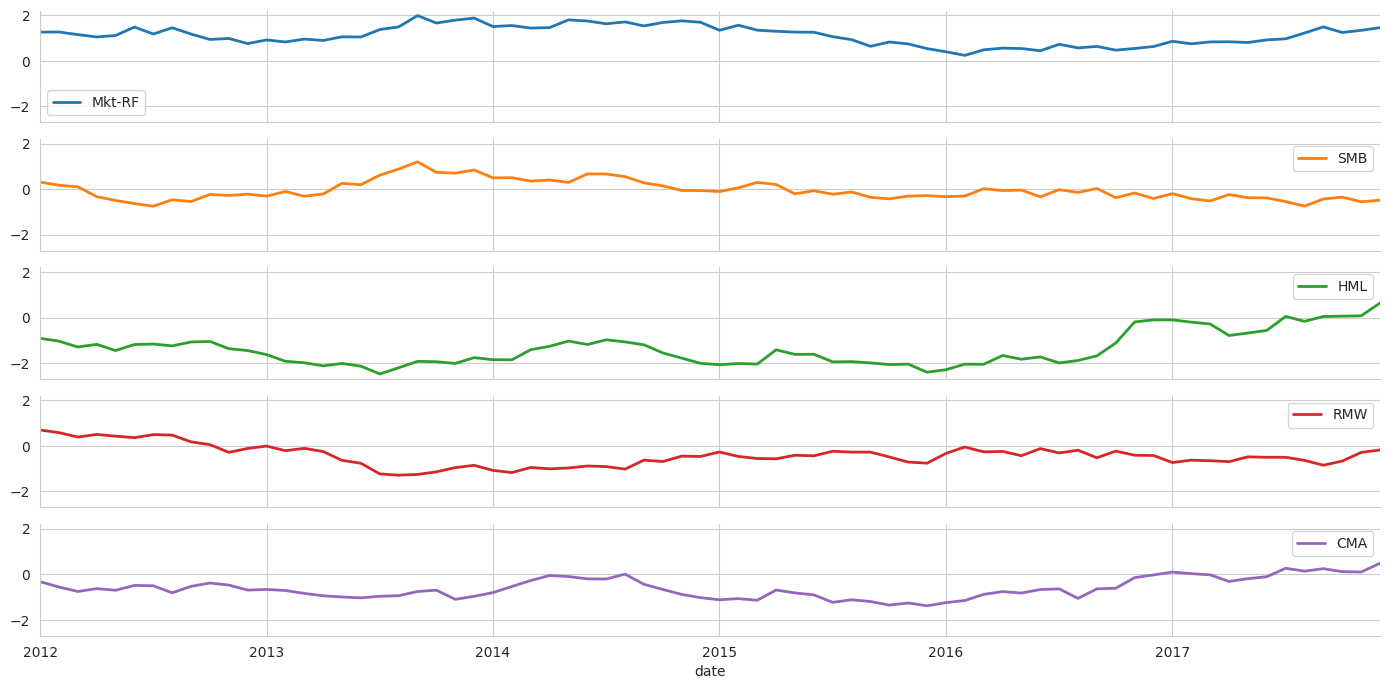

In [62]:
window = 24  # months
lambdas.rolling(window).mean().dropna().plot(lw=2,
                                             figsize=(14, 7),
                                             subplots=True,
                                             sharey=True)
sns.despine()
plt.tight_layout()

## Fama-Macbeth with the LinearModels library

linear_models 라이브러리는 panel 데이터를 위한 다양한 모델을 statsmodels에 추가하며, 또한 두 단계의 파마-맥베스 절차를 구현합니다.

In [63]:
mod = LinearFactorModel(portfolios=ff_portfolio_data,
                        factors=ff_factor_data)
res = mod.fit()
print(res)

                      LinearFactorModel Estimation Summary                      
No. Test Portfolios:                 17   R-squared:                      0.6879
No. Factors:                          5   J-statistic:                    15.622
No. Observations:                    95   P-value                         0.2091
Date:                  Sat, Jun 24 2023   Distribution:                 chi2(12)
Time:                          16:21:46                                         
Cov. Estimator:                  robust                                         
                                                                                
                            Risk Premia Estimates                             
            Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
------------------------------------------------------------------------------
Mkt-RF         1.2357     0.4097     3.0158     0.0026      0.4326      2.0388
SMB            0.0202     0.8688    

In [64]:
print(res.full_summary)

                      LinearFactorModel Estimation Summary                      
No. Test Portfolios:                 17   R-squared:                      0.6879
No. Factors:                          5   J-statistic:                    15.622
No. Observations:                    95   P-value                         0.2091
Date:                  Sat, Jun 24 2023   Distribution:                 chi2(12)
Time:                          16:21:46                                         
Cov. Estimator:                  robust                                         
                                                                                
                            Risk Premia Estimates                             
            Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
------------------------------------------------------------------------------
Mkt-RF         1.2357     0.4097     3.0158     0.0026      0.4326      2.0388
SMB            0.0202     0.8688    

This provides us with the same result:

In [65]:
lambdas.mean()

Mkt-RF    1.24
SMB       0.02
HML      -1.11
RMW      -0.28
CMA      -0.51
dtype: float64

## 수축 방법을 사용한 선형 회귀 규제화
### 과대적합을 방지하는 방법
- 규제화 기법: 계수가 큰 값에 도달하지 못하도록 오차 함수에 페널티 항을 추가하는 것
- 선형 모델에 대한 접근 방식을 개선하기 위한 수축 방법
    - 예측 정확도
    - 해석

### 리지 회귀 분석의 작동 방식
- 리지 회귀는 제곱 계속의 합에 해당하는 페널티를 목표 함수에 추가해 회귀 계수를 수축하는데, 이는 계수 벡터의 L2 규제화에 해당한다.

### 라쏘 회귀 분석의 작동 방식
- 라쏘 회귀는 잔차 제곱의 합에 페널티를 추가해 계수를 수축시키지만 라쏘 페널티는 약간 다른 효과를 가진다. L1 규제화에 해당하는 계수 벡터의 절댓값 합이다.

## 선형 회귀로 수익률을 예측하는 방법
### 모델 특성과 선도 수익률 준비
예측 모델에 대한 데이터를 준비하려면 다음을 수행한다.
- 주식의 유니버스와 기간을 선택한다.
- 특성으로 사용할 알파 팩터를 구축하고 변환한다.
- 예측하고자 하는 미래 수익률을 계산하다.
- 그리고 (잠재적으로) 데이터를 정제한다.


- 03_preparing_the_model_data.ipynb

# Preparing Alpha Factors and Features to predict Stock Returns

## Imports & Settings

In [66]:
import warnings
warnings.filterwarnings('ignore')

In [70]:
# colab에서 talib 설치
!wget http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz
!tar -xzvf ta-lib-0.4.0-src.tar.gz
%cd ta-lib
!./configure --prefix=/usr
!make
!make install
!pip install Ta-Lib
import talib

--2023-06-24 16:31:48--  http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz
Resolving prdownloads.sourceforge.net (prdownloads.sourceforge.net)... 204.68.111.105
Connecting to prdownloads.sourceforge.net (prdownloads.sourceforge.net)|204.68.111.105|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz [following]
--2023-06-24 16:31:48--  http://downloads.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz
Resolving downloads.sourceforge.net (downloads.sourceforge.net)... 204.68.111.105
Reusing existing connection to prdownloads.sourceforge.net:80.
HTTP request sent, awaiting response... 302 Found
Location: http://netactuate.dl.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz [following]
--2023-06-24 16:31:48--  http://netactuate.dl.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz
Resolving netactuat

In [71]:
%matplotlib inline

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import pearsonr, spearmanr
from talib import RSI, BBANDS, MACD, ATR

In [72]:
MONTH = 21
YEAR = 12 * MONTH

In [73]:
START = '2013-01-01'
END = '2017-12-31'

In [74]:
sns.set_style('whitegrid')
idx = pd.IndexSlice

## Loading Quandl Wiki Stock Prices & Meta Data

In [75]:
ohlcv = ['adj_open', 'adj_close', 'adj_low', 'adj_high', 'adj_volume']

In [89]:
DATA_STORE = '/content/assets.h5'

In [88]:
!pwd

/content/ta-lib


In [135]:
with pd.HDFStore(DATA_STORE) as store:
    prices = (store['quandl/wiki/prices']
              .loc[idx[START:END, :], ohlcv]
              .rename(columns=lambda x: x.replace('adj_', ''))
              .assign(volume=lambda x: x.volume.div(1000))
              .swaplevel()
              .sort_index())

    stocks = (store['us_equities/stocks']
              .loc[:, ['marketcap', 'ipoyear', 'sector']])

## Remove stocks with few observations

In [136]:
# want at least 2 years of data
min_obs = 2 * YEAR

# have this much per ticker
nobs = prices.groupby(level='ticker').size()

# keep those that exceed the limit
keep = nobs[nobs > min_obs].index

prices = prices.loc[idx[keep, :], :]

### Align price and meta data

In [137]:
stocks = stocks[~stocks.index.duplicated() & stocks.sector.notnull()]
stocks.sector = stocks.sector.str.lower().str.replace(' ', '_')
stocks.index.name = 'ticker'

In [138]:
shared = (prices.index.get_level_values('ticker').unique()
          .intersection(stocks.index))
stocks = stocks.loc[shared, :]
prices = prices.loc[idx[shared, :], :]

In [139]:
prices.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 2904233 entries, ('A', Timestamp('2013-01-02 00:00:00')) to ('ZUMZ', Timestamp('2017-12-29 00:00:00'))
Data columns (total 5 columns):
 #   Column  Non-Null Count    Dtype  
---  ------  --------------    -----  
 0   open    2904233 non-null  float64
 1   close   2904233 non-null  float64
 2   low     2904233 non-null  float64
 3   high    2904233 non-null  float64
 4   volume  2904233 non-null  float64
dtypes: float64(5)
memory usage: 122.6+ MB


In [140]:
stocks.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Index: 2348 entries, A to ZUMZ
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   marketcap  2345 non-null   float64
 1   ipoyear    1026 non-null   float64
 2   sector     2348 non-null   object 
dtypes: float64(2), object(1)
memory usage: 73.4+ KB


In [141]:
stocks.sector.value_counts()

consumer_services        440
finance                  393
technology               297
health_care              297
capital_goods            227
basic_industries         138
consumer_non-durables    126
energy                   123
public_utilities         105
consumer_durables         78
miscellaneous             69
transportation            55
Name: sector, dtype: int64

Optional: persist intermediate results:

In [142]:
# with pd.HDFStore('tmp.h5') as store:
#     store.put('prices', prices)
#     store.put('stocks', stocks)

In [143]:
# with pd.HDFStore('tmp.h5') as store:
#     prices = store['prices']
#     stocks = store['stocks']

## Compute Rolling Average Dollar Volume

In [144]:
# compute dollar volume to determine universe
prices['dollar_vol'] = prices[['close', 'volume']].prod(axis=1)

In [145]:
prices['dollar_vol_1m'] = prices.groupby('ticker')['dollar_vol'].rolling(window=21).mean().values

In [146]:
prices.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 2904233 entries, ('A', Timestamp('2013-01-02 00:00:00')) to ('ZUMZ', Timestamp('2017-12-29 00:00:00'))
Data columns (total 7 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   open           2904233 non-null  float64
 1   close          2904233 non-null  float64
 2   low            2904233 non-null  float64
 3   high           2904233 non-null  float64
 4   volume         2904233 non-null  float64
 5   dollar_vol     2904233 non-null  float64
 6   dollar_vol_1m  2857273 non-null  float64
dtypes: float64(7)
memory usage: 166.9+ MB


In [147]:
prices['dollar_vol_rank'] = (prices.groupby('date')
                             .dollar_vol_1m
                             .rank(ascending=False))

In [148]:
prices.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 2904233 entries, ('A', Timestamp('2013-01-02 00:00:00')) to ('ZUMZ', Timestamp('2017-12-29 00:00:00'))
Data columns (total 8 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   open             2904233 non-null  float64
 1   close            2904233 non-null  float64
 2   low              2904233 non-null  float64
 3   high             2904233 non-null  float64
 4   volume           2904233 non-null  float64
 5   dollar_vol       2904233 non-null  float64
 6   dollar_vol_1m    2857273 non-null  float64
 7   dollar_vol_rank  2857273 non-null  float64
dtypes: float64(8)
memory usage: 189.1+ MB


## Add some Basic Factors

### Compute the Relative Strength Index

In [149]:
prices['rsi'] = prices.groupby(level='ticker').close.apply(RSI)

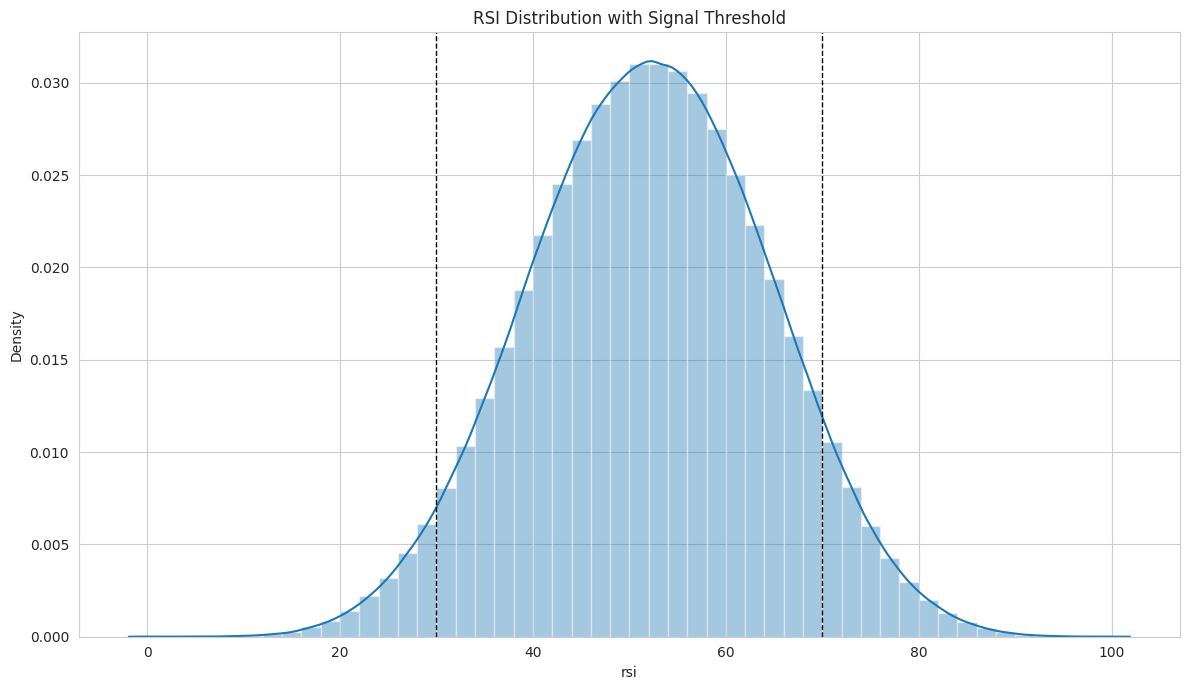

In [150]:
ax = sns.distplot(prices.rsi.dropna())
ax.axvline(30, ls='--', lw=1, c='k')
ax.axvline(70, ls='--', lw=1, c='k')
ax.set_title('RSI Distribution with Signal Threshold')
plt.tight_layout();

### Compute Bollinger Bands

In [151]:
def compute_bb(close):
    high, mid, low = BBANDS(close, timeperiod=20)
    return pd.DataFrame({'bb_high': high, 'bb_low': low}, index=close.index)

In [152]:
prices = (prices.join(prices
                      .groupby(level='ticker')
                      .close
                      .apply(compute_bb)))

In [153]:
prices['bb_high'] = prices.bb_high.sub(prices.close).div(prices.bb_high).apply(np.log1p)
prices['bb_low'] = prices.close.sub(prices.bb_low).div(prices.close).apply(np.log1p)

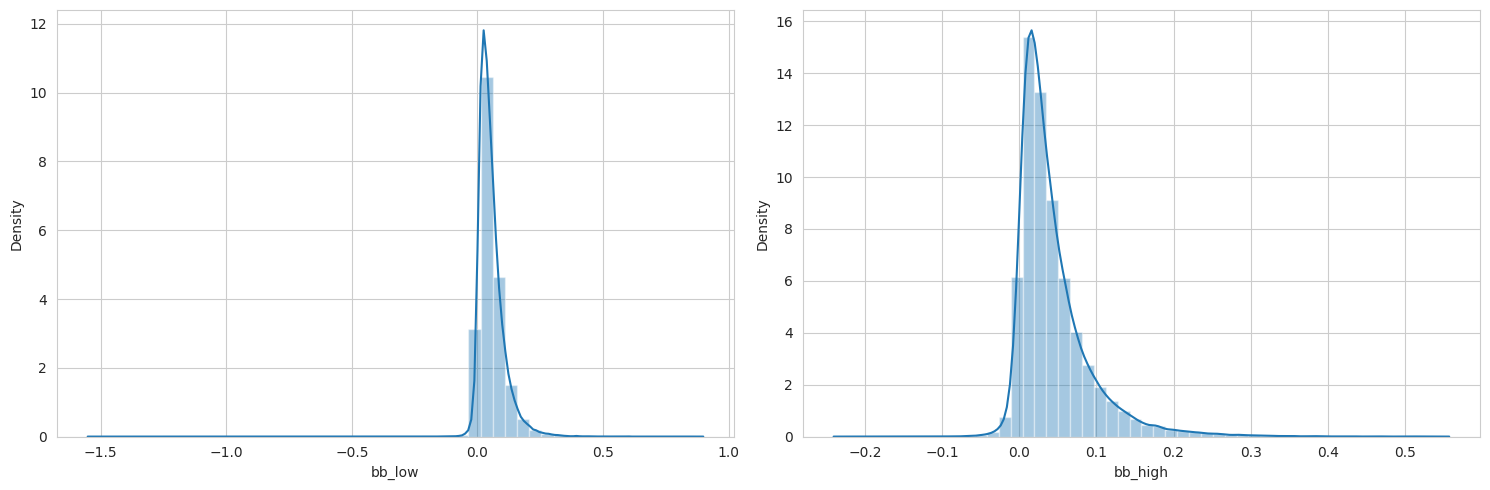

In [154]:
fig, axes = plt.subplots(ncols=2, figsize=(15, 5))
sns.distplot(prices.loc[prices.dollar_vol_rank<100, 'bb_low'].dropna(), ax=axes[0])
sns.distplot(prices.loc[prices.dollar_vol_rank<100, 'bb_high'].dropna(), ax=axes[1])
plt.tight_layout();

### Compute Average True Range

In [155]:
def compute_atr(stock_data):
    df = ATR(stock_data.high, stock_data.low,
             stock_data.close, timeperiod=14)
    return df.sub(df.mean()).div(df.std())

In [156]:
prices['atr'] = (prices.groupby('ticker', group_keys=False)
                 .apply(compute_atr))

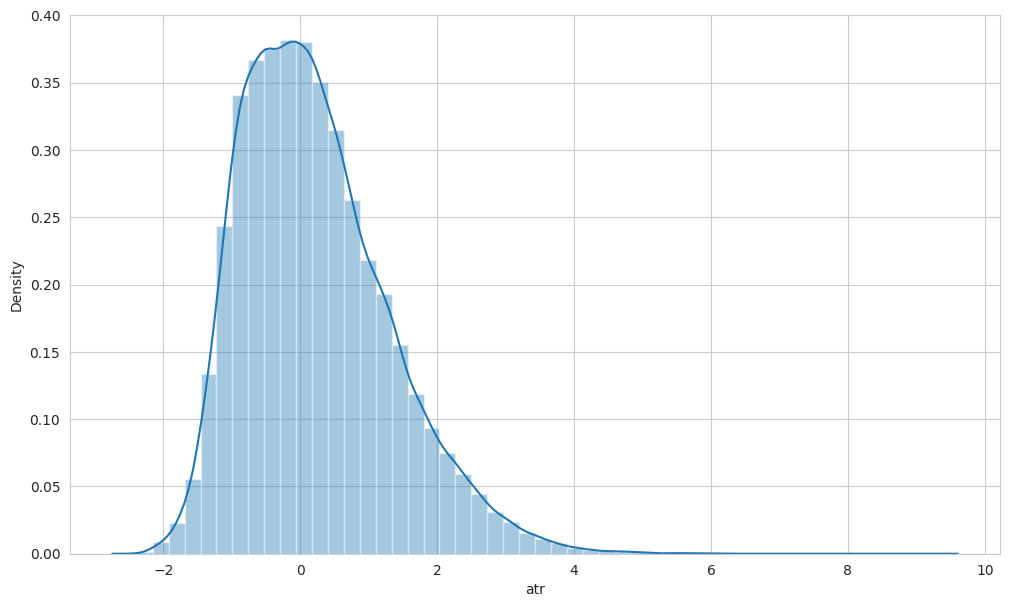

In [157]:
sns.distplot(prices[prices.dollar_vol_rank<50].atr.dropna());

### Compute Moving Average Convergence/Divergence

In [158]:
def compute_macd(close):
    macd = MACD(close)[0]
    return (macd - np.mean(macd))/np.std(macd)

In [159]:
prices['macd'] = (prices
                  .groupby('ticker', group_keys=False)
                  .close
                  .apply(compute_macd))

In [160]:
prices.macd.describe(percentiles=[.001, .01, .02, .03, .04, .05, .95, .96, .97, .98, .99, .999]).apply(lambda x: f'{x:,.1f}')

count    2,826,749.0
mean             0.0
std              1.0
min            -10.5
0.1%            -4.1
1%              -2.6
2%              -2.2
3%              -2.0
4%              -1.8
5%              -1.6
50%              0.0
95%              1.6
96%              1.7
97%              1.9
98%              2.1
99%              2.6
99.9%            4.0
max              8.7
Name: macd, dtype: object

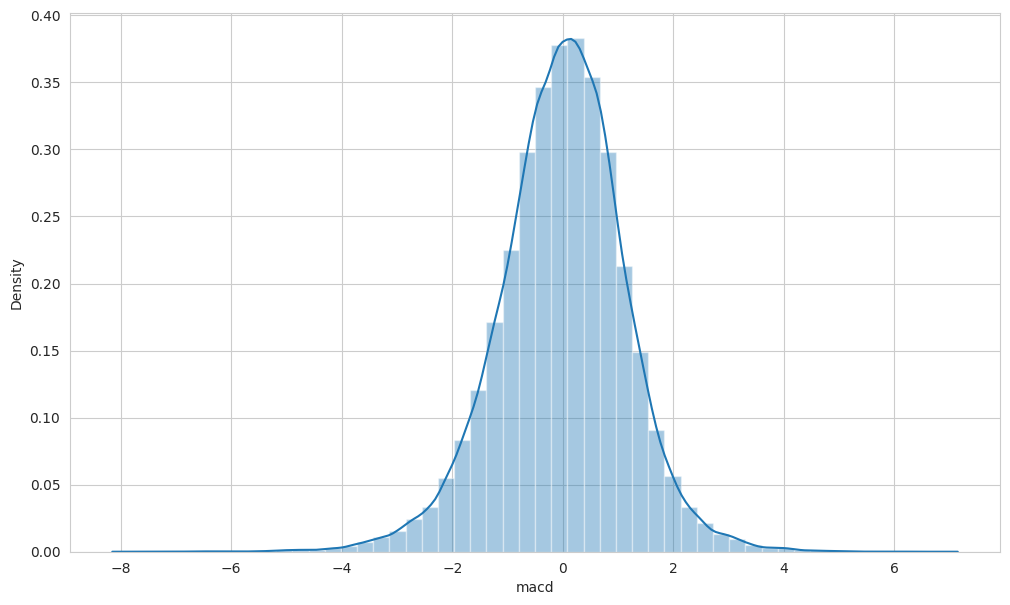

In [161]:
sns.distplot(prices[prices.dollar_vol_rank<100].macd.dropna());

## Compute Lagged Returns

In [162]:
lags = [1, 5, 10, 21, 42, 63]

In [163]:
returns = prices.groupby(level='ticker').close.pct_change()
percentiles=[.0001, .001, .01]
percentiles+= [1-p for p in percentiles]
returns.describe(percentiles=percentiles).iloc[2:].to_frame('percentiles').style.format(lambda x: f'{x:,.2%}')

,percentiles
std,9.37%
min,-87.62%
0.01%,-33.40%
0.1%,-14.78%
1%,-6.52%
50%,0.04%
99%,6.98%
99.9%,17.03%
99.99%,39.25%
max,"10,280.40%"


In [164]:
q = 0.0001

### Winsorize outliers

In [165]:
for lag in lags:
    prices[f'return_{lag}d'] = (prices.groupby(level='ticker').close
                                .pct_change(lag)
                                .pipe(lambda x: x.clip(lower=x.quantile(q),
                                                       upper=x.quantile(1 - q)))
                                .add(1)
                                .pow(1 / lag)
                                .sub(1)
                                )

### Shift lagged returns

In [166]:
for t in [1, 2, 3, 4, 5]:
    for lag in [1, 5, 10, 21]:
        prices[f'return_{lag}d_lag{t}'] = (prices.groupby(level='ticker')
                                           [f'return_{lag}d'].shift(t * lag))

## Compute Forward Returns

In [167]:
for t in [1, 5, 10, 21]:
    prices[f'target_{t}d'] = prices.groupby(level='ticker')[f'return_{t}d'].shift(-t)

## Combine Price and Meta Data

In [168]:
prices = prices.join(stocks[['sector']])

## Create time and sector dummy variables

In [169]:
prices['year'] = prices.index.get_level_values('date').year
prices['month'] = prices.index.get_level_values('date').month

In [170]:
prices.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 2904233 entries, ('A', Timestamp('2013-01-02 00:00:00')) to ('ZUMZ', Timestamp('2017-12-29 00:00:00'))
Data columns (total 46 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   open             2904233 non-null  float64
 1   close            2904233 non-null  float64
 2   low              2904233 non-null  float64
 3   high             2904233 non-null  float64
 4   volume           2904233 non-null  float64
 5   dollar_vol       2904233 non-null  float64
 6   dollar_vol_1m    2857273 non-null  float64
 7   dollar_vol_rank  2857273 non-null  float64
 8   rsi              2871361 non-null  float64
 9   bb_high          2859618 non-null  float64
 10  bb_low           2859585 non-null  float64
 11  atr              2871361 non-null  float64
 12  macd             2826749 non-null  float64
 13  return_1d        2901885 non-null  float64
 14  return_5d        2892493 non-null  float6

In [171]:
prices.assign(sector=pd.factorize(prices.sector, sort=True)[0]).to_hdf('/content/data.h5', 'model_data/no_dummies')

In [172]:
prices = pd.get_dummies(prices,
                        columns=['year', 'month', 'sector'],
                        prefix=['year', 'month', ''],
                        prefix_sep=['_', '_', ''],
                        drop_first=True)

In [173]:
prices.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 2904233 entries, ('A', Timestamp('2013-01-02 00:00:00')) to ('ZUMZ', Timestamp('2017-12-29 00:00:00'))
Data columns (total 69 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   open                   2904233 non-null  float64
 1   close                  2904233 non-null  float64
 2   low                    2904233 non-null  float64
 3   high                   2904233 non-null  float64
 4   volume                 2904233 non-null  float64
 5   dollar_vol             2904233 non-null  float64
 6   dollar_vol_1m          2857273 non-null  float64
 7   dollar_vol_rank        2857273 non-null  float64
 8   rsi                    2871361 non-null  float64
 9   bb_high                2859618 non-null  float64
 10  bb_low                 2859585 non-null  float64
 11  atr                    2871361 non-null  float64
 12  macd                   2826749 non-null  float64
 13 

## Store Model Data

In [174]:
prices.to_hdf('/content/data.h5', 'model_data')

## Explore Data

### Plot Factors

In [175]:
target = 'target_5d'
top100 = prices[prices.dollar_vol_rank<100].copy()

### RSI

In [176]:
top100.loc[:, 'rsi_signal'] = pd.cut(top100.rsi, bins=[0, 30, 70, 100])

In [177]:
top100.groupby('rsi_signal')['target_5d'].describe()

,count,mean,std,min,25%,50%,75%,max
rsi_signal,,,,,,,,
"(0, 30]","4,209.00",0.00,0.01,-0.07,-0.00,0.00,0.01,0.06
"(30, 70]","107,244.00",0.00,0.01,-0.17,-0.00,0.00,0.00,0.08
"(70, 100]","10,634.00",0.00,0.01,-0.09,-0.00,0.00,0.00,0.06


### Bollinger Bands

-2.68% (0.00%)


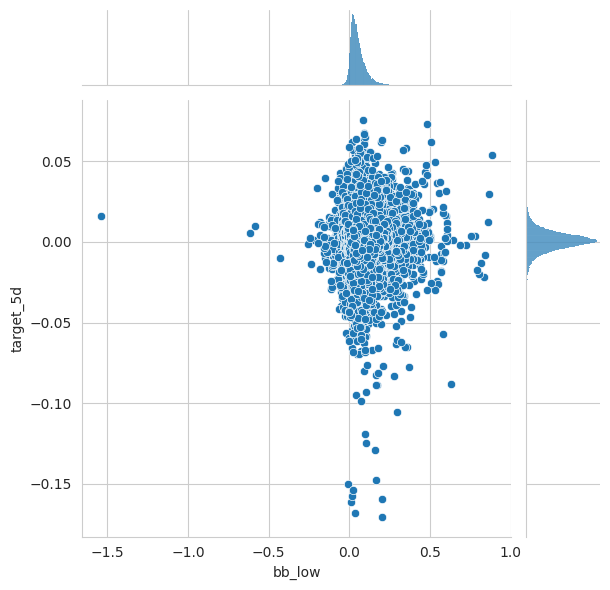

In [178]:
metric = 'bb_low'
j=sns.jointplot(x=metric, y=target, data=top100)

df = top100[[metric, target]].dropna()
r, p = spearmanr(df[metric], df[target])
print(f'{r:,.2%} ({p:.2%})')

4.21% (0.00%)


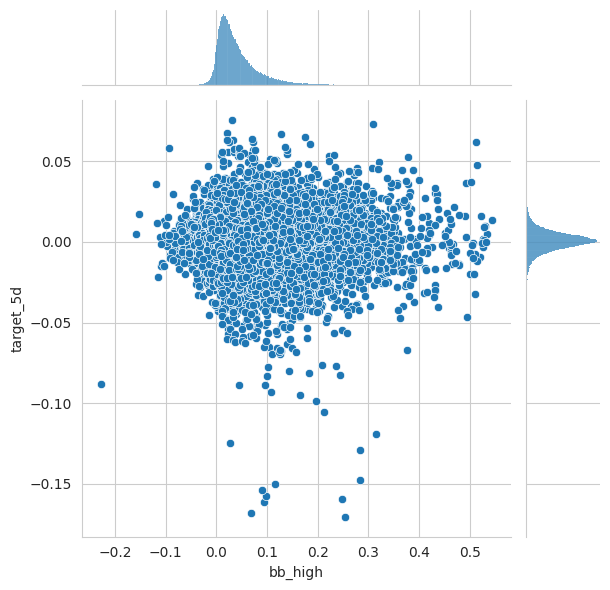

In [179]:
metric = 'bb_high'
j=sns.jointplot(x=metric, y=target, data=top100)

df = top100[[metric, target]].dropna()
r, p = spearmanr(df[metric], df[target])
print(f'{r:,.2%} ({p:.2%})')

### ATR

0.07% (80.08%)


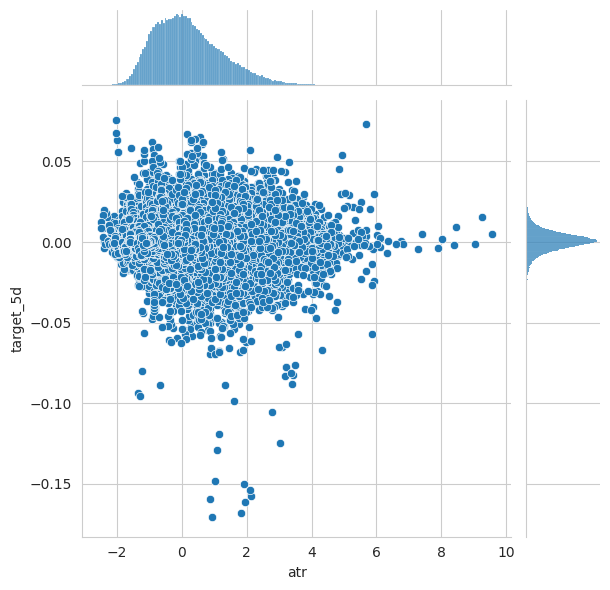

In [180]:
metric = 'atr'
j=sns.jointplot(x=metric, y=target, data=top100)

df = top100[[metric, target]].dropna()
r, p = spearmanr(df[metric], df[target])
print(f'{r:,.2%} ({p:.2%})')

### MACD

-4.72% (0.00%)


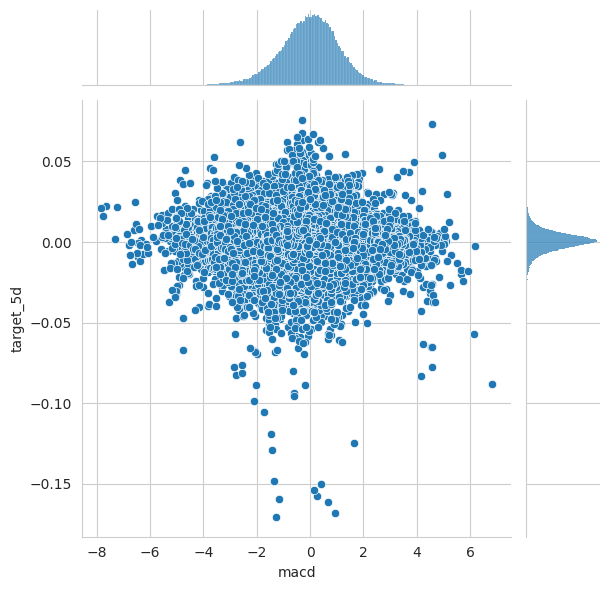

In [181]:
metric = 'macd'
j=sns.jointplot(x=metric, y=target, data=top100)

df = top100[[metric, target]].dropna()
r, p = spearmanr(df[metric], df[target])
print(f'{r:,.2%} ({p:.2%})')

### statsmodels를 사용한 선형 OLS 회귀 분석
- 04_statistical_inference_of_stock_returns_with_statsmodels.ipynb

# Statistical inference of stock returns with linear regression

## Imports & Settings

In [182]:
import warnings
warnings.filterwarnings('ignore')

In [183]:
%matplotlib inline

import pandas as pd

from statsmodels.api import OLS, add_constant, graphics
from statsmodels.graphics.tsaplots import plot_acf
from scipy.stats import norm

import seaborn as sns
import matplotlib.pyplot as plt

In [184]:
sns.set_style('whitegrid')
idx = pd.IndexSlice

## Load Data

In [185]:
with pd.HDFStore('/content/data.h5') as store:
    data = (store['model_data']
            .dropna()
            .drop(['open', 'close', 'low', 'high'], axis=1))

### Select Investment Universe

In [186]:
data = data[data.dollar_vol_rank<100]

In [187]:
data.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 109675 entries, ('AAL', Timestamp('2013-07-25 00:00:00')) to ('ZTS', Timestamp('2014-12-04 00:00:00'))
Data columns (total 65 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   volume                 109675 non-null  float64
 1   dollar_vol             109675 non-null  float64
 2   dollar_vol_1m          109675 non-null  float64
 3   dollar_vol_rank        109675 non-null  float64
 4   rsi                    109675 non-null  float64
 5   bb_high                109675 non-null  float64
 6   bb_low                 109675 non-null  float64
 7   atr                    109675 non-null  float64
 8   macd                   109675 non-null  float64
 9   return_1d              109675 non-null  float64
 10  return_5d              109675 non-null  float64
 11  return_10d             109675 non-null  float64
 12  return_21d             109675 non-null  float64
 13  return_42d    

### Create Model Data

In [188]:
y = data.filter(like='target')
X = data.drop(y.columns, axis=1)
X = X.drop(['dollar_vol', 'dollar_vol_rank', 'volume', 'consumer_durables'], axis=1)

## Explore Data

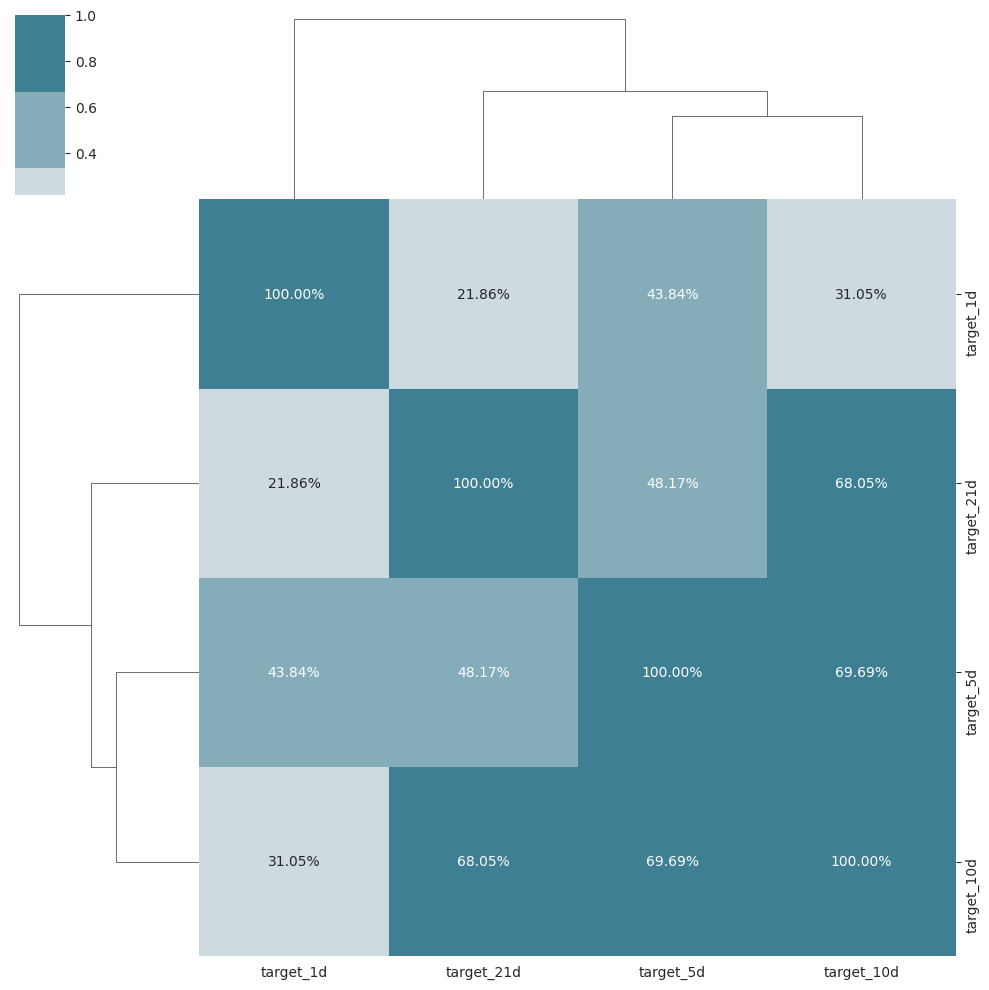

In [189]:
sns.clustermap(y.corr(), cmap=sns.diverging_palette(h_neg=20, h_pos=220), center=0, annot=True, fmt='.2%');

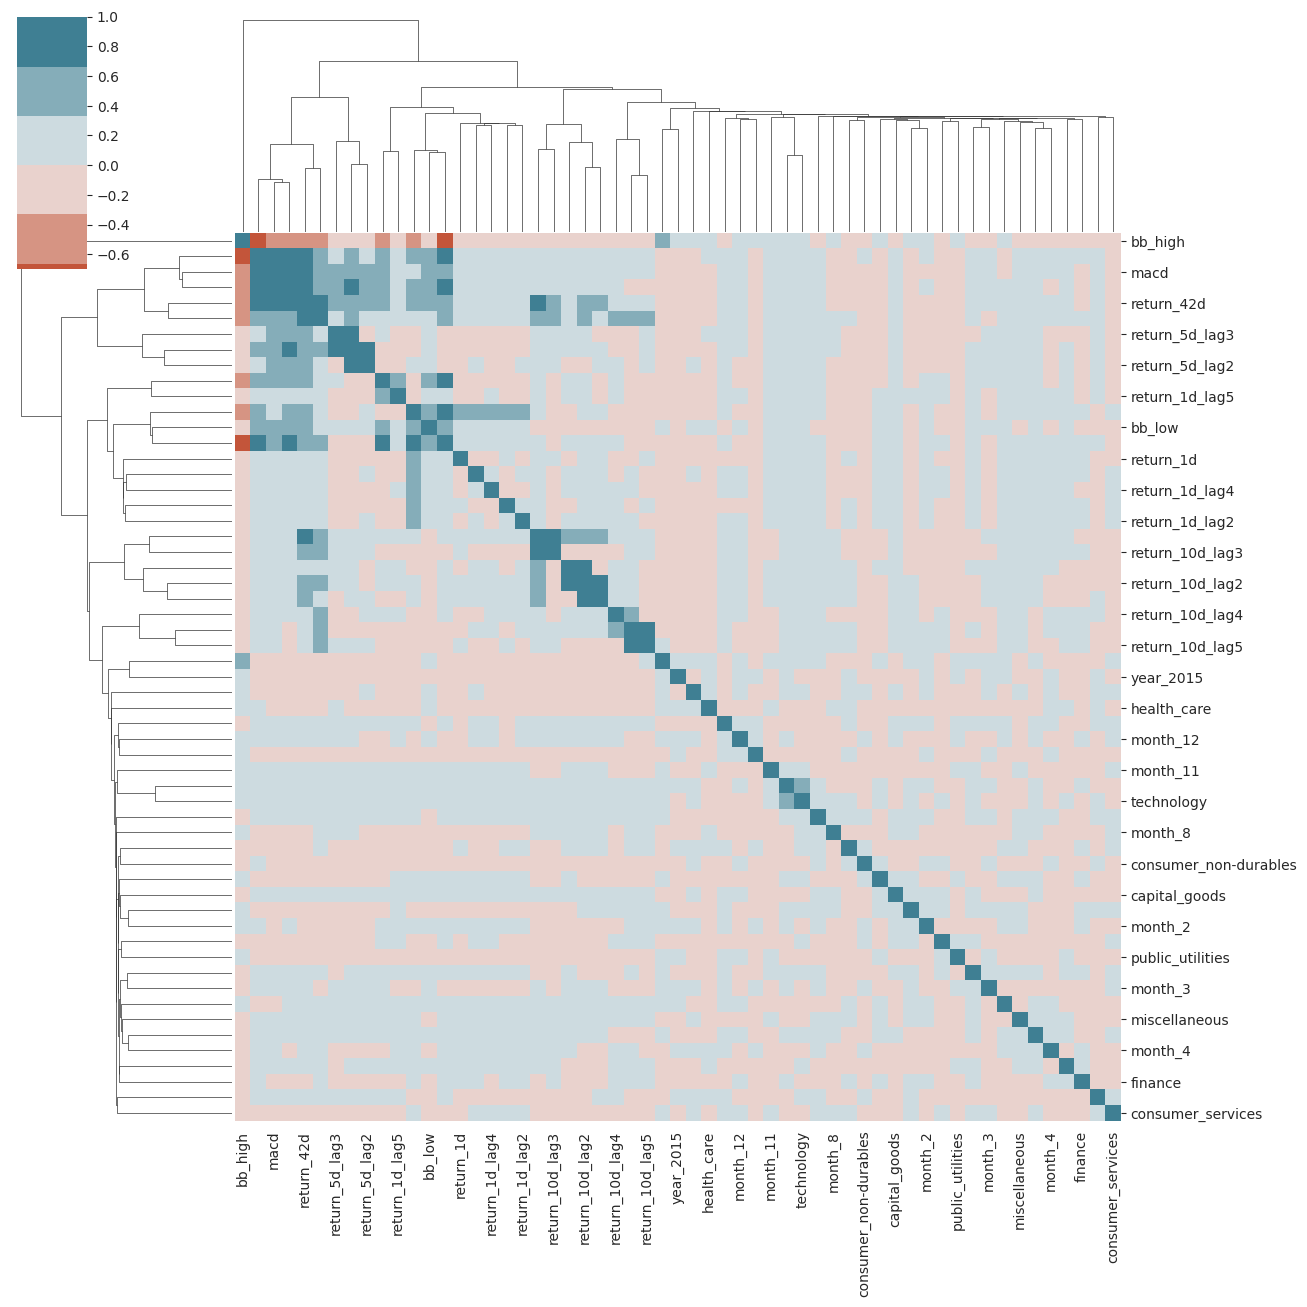

In [190]:
sns.clustermap(X.corr(), cmap=sns.diverging_palette(h_neg=20, h_pos=220), center=0);
plt.gcf().set_size_inches((14, 14))

In [191]:
corr_mat = X.corr().stack().reset_index()
corr_mat.columns=['var1', 'var2', 'corr']
corr_mat = corr_mat[corr_mat.var1!=corr_mat.var2].sort_values(by='corr', ascending=False)

In [192]:
corr_mat.head().append(corr_mat.tail())

,var1,var2,corr
581,return_42d,return_63d,0.84
637,return_63d,return_42d,0.84
286,macd,rsi,0.82
62,rsi,macd,0.82
518,return_21d,macd,0.79
515,return_21d,bb_high,-0.63
122,bb_high,return_10d,-0.69
458,return_10d,bb_high,-0.69
59,rsi,bb_high,-0.70
115,bb_high,rsi,-0.70


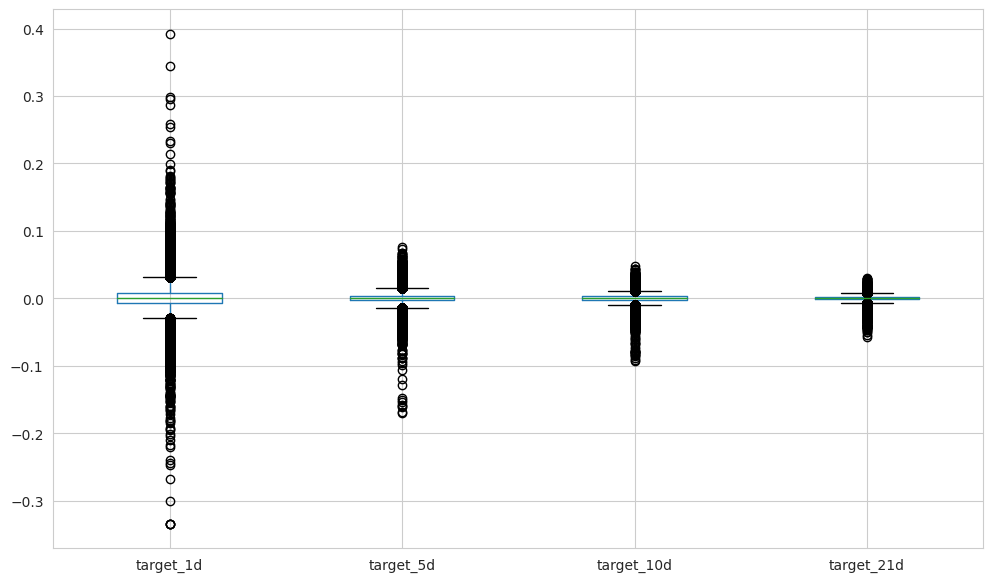

In [193]:
y.boxplot();

## Linear Regression for Statistical Inference: OLS with statsmodels

### Ticker-wise standardization

`statsmodels` warns of high design matrix condition numbers. This can arise when the variables are not standardized and the Eigenvalues differ due to scaling. The following step avoids this warning.

In [194]:
sectors = X.iloc[:, -10:]
X = (X.drop(sectors.columns, axis=1)
     .groupby(level='ticker')
     .transform(lambda x: (x - x.mean()) / x.std())
    .join(sectors)
    .fillna(0))

### 1-Day Returns

In [195]:
target = 'target_1d'
model = OLS(endog=y[target], exog=add_constant(X))
trained_model = model.fit()
print(trained_model.summary())

                            OLS Regression Results                            
Dep. Variable:              target_1d   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                  0.009
Method:                 Least Squares   F-statistic:                     19.03
Date:                Sat, 24 Jun 2023   Prob (F-statistic):          9.43e-189
Time:                        16:50:07   Log-Likelihood:             2.8852e+05
No. Observations:              109675   AIC:                        -5.769e+05
Df Residuals:                  109617   BIC:                        -5.764e+05
Df Model:                          57                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.00

### 5-Day Returns

In [196]:
target = 'target_5d'
model = OLS(endog=y[target], exog=add_constant(X))
trained_model = model.fit()
print(trained_model.summary())

                            OLS Regression Results                            
Dep. Variable:              target_5d   R-squared:                       0.031
Model:                            OLS   Adj. R-squared:                  0.031
Method:                 Least Squares   F-statistic:                     61.86
Date:                Sat, 24 Jun 2023   Prob (F-statistic):               0.00
Time:                        16:50:08   Log-Likelihood:             3.7883e+05
No. Observations:              109675   AIC:                        -7.575e+05
Df Residuals:                  109617   BIC:                        -7.570e+05
Df Model:                          57                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.00

#### Obtain the residuals

In [197]:
preds = trained_model.predict(add_constant(X))
residuals = y[target] - preds

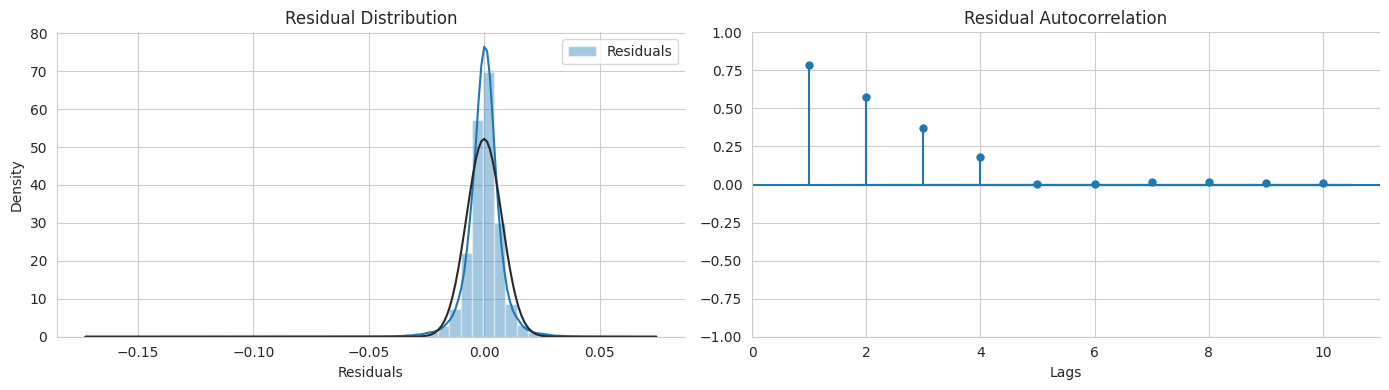

In [198]:
fig, axes = plt.subplots(ncols=2, figsize=(14,4))
sns.distplot(residuals, fit=norm, ax=axes[0], axlabel='Residuals', label='Residuals')
axes[0].set_title('Residual Distribution')
axes[0].legend()
plot_acf(residuals, lags=10, zero=False, ax=axes[1], title='Residual Autocorrelation')
axes[1].set_xlabel('Lags')
sns.despine()
fig.tight_layout();

### 10-Day Returns

In [199]:
target = 'target_10d'
model = OLS(endog=y[target], exog=add_constant(X))
trained_model = model.fit()
print(trained_model.summary())

                            OLS Regression Results                            
Dep. Variable:             target_10d   R-squared:                       0.043
Model:                            OLS   Adj. R-squared:                  0.042
Method:                 Least Squares   F-statistic:                     85.38
Date:                Sat, 24 Jun 2023   Prob (F-statistic):               0.00
Time:                        16:50:16   Log-Likelihood:             4.1892e+05
No. Observations:              109675   AIC:                        -8.377e+05
Df Residuals:                  109617   BIC:                        -8.372e+05
Df Model:                          57                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.00

### Monthly Returns

In [200]:
target = 'target_21d'
model = OLS(endog=y[target], exog=add_constant(X))
trained_model = model.fit()
print(trained_model.summary())

                            OLS Regression Results                            
Dep. Variable:             target_21d   R-squared:                       0.059
Model:                            OLS   Adj. R-squared:                  0.058
Method:                 Least Squares   F-statistic:                     119.7
Date:                Sat, 24 Jun 2023   Prob (F-statistic):               0.00
Time:                        16:50:17   Log-Likelihood:             4.6155e+05
No. Observations:              109675   AIC:                        -9.230e+05
Df Residuals:                  109617   BIC:                        -9.224e+05
Df Model:                          57                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.00

### 사이킷런을 이용한 선형 OLS 회귀
- 05_predicting_stock_returns_with_linear_regression.ipynb

# Prediction stock returns with linear regression

## Imports & Settings

In [201]:
import warnings
warnings.filterwarnings('ignore')

In [202]:
%matplotlib inline

from time import time
from pathlib import Path
import pandas as pd
import numpy as np
from scipy.stats import spearmanr

from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.pipeline import Pipeline

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

In [203]:
sns.set_style('darkgrid')
idx = pd.IndexSlice

In [204]:
YEAR = 252

## Load Data

In [205]:
with pd.HDFStore('/content/data.h5') as store:
    data = (store['model_data']
            .dropna()
            .drop(['open', 'close', 'low', 'high'], axis=1))

In [206]:
data.index.names = ['symbol', 'date']

In [207]:
data = data.drop([c for c in data.columns if 'lag' in c], axis=1)

### Select Investment Universe

In [208]:
data = data[data.dollar_vol_rank<100]

In [209]:
data.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 109675 entries, ('AAL', Timestamp('2013-07-25 00:00:00')) to ('ZTS', Timestamp('2014-12-04 00:00:00'))
Data columns (total 45 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   volume                 109675 non-null  float64
 1   dollar_vol             109675 non-null  float64
 2   dollar_vol_1m          109675 non-null  float64
 3   dollar_vol_rank        109675 non-null  float64
 4   rsi                    109675 non-null  float64
 5   bb_high                109675 non-null  float64
 6   bb_low                 109675 non-null  float64
 7   atr                    109675 non-null  float64
 8   macd                   109675 non-null  float64
 9   return_1d              109675 non-null  float64
 10  return_5d              109675 non-null  float64
 11  return_10d             109675 non-null  float64
 12  return_21d             109675 non-null  float64
 13  return_42d    

### Create Model Data

In [210]:
y = data.filter(like='target')
X = data.drop(y.columns, axis=1)
X = X.drop(['dollar_vol', 'dollar_vol_rank', 'volume', 'consumer_durables'], axis=1)

## Custom MultipleTimeSeriesCV

In [211]:
class MultipleTimeSeriesCV:
    """Generates tuples of train_idx, test_idx pairs
    Assumes the MultiIndex contains levels 'symbol' and 'date'
    purges overlapping outcomes"""

    def __init__(self,
                 n_splits=3,
                 train_period_length=126,
                 test_period_length=21,
                 lookahead=None,
                 shuffle=False):
        self.n_splits = n_splits
        self.lookahead = lookahead
        self.test_length = test_period_length
        self.train_length = train_period_length
        self.shuffle = shuffle

    def split(self, X, y=None, groups=None):
        unique_dates = X.index.get_level_values('date').unique()
        days = sorted(unique_dates, reverse=True)

        split_idx = []
        for i in range(self.n_splits):
            test_end_idx = i * self.test_length
            test_start_idx = test_end_idx + self.test_length
            train_end_idx = test_start_idx + + self.lookahead - 1
            train_start_idx = train_end_idx + self.train_length + self.lookahead - 1
            split_idx.append([train_start_idx, train_end_idx,
                              test_start_idx, test_end_idx])

        dates = X.reset_index()[['date']]
        for train_start, train_end, test_start, test_end in split_idx:
            train_idx = dates[(dates.date > days[train_start])
                              & (dates.date <= days[train_end])].index
            test_idx = dates[(dates.date > days[test_start])
                             & (dates.date <= days[test_end])].index
            if self.shuffle:
                np.random.shuffle(list(train_idx))
            yield train_idx, test_idx

    def get_n_splits(self, X, y, groups=None):
        return self.n_splits

### Verify that it works

In [212]:
train_period_length = 63
test_period_length = 10
n_splits = int(3 * YEAR/test_period_length)
lookahead =1

cv = MultipleTimeSeriesCV(n_splits=n_splits,
                          test_period_length=test_period_length,
                          lookahead=lookahead,
                          train_period_length=train_period_length)

In [213]:
i = 0
for train_idx, test_idx in cv.split(X=data):
    train = data.iloc[train_idx]
    train_dates = train.index.get_level_values('date')
    test = data.iloc[test_idx]
    test_dates = test.index.get_level_values('date')
    df = train.reset_index().append(test.reset_index())
    n = len(df)
    assert n== len(df.drop_duplicates())
    print(train.groupby(level='symbol').size().value_counts().index[0],
          train_dates.min().date(), train_dates.max().date(),
          test.groupby(level='symbol').size().value_counts().index[0],
          test_dates.min().date(), test_dates.max().date())
    i += 1
    if i == 10:
        break

63 2017-08-16 2017-11-14 10 2017-11-15 2017-11-29
63 2017-08-02 2017-10-30 10 2017-10-31 2017-11-14
63 2017-07-19 2017-10-16 10 2017-10-17 2017-10-30
63 2017-07-05 2017-10-02 10 2017-10-03 2017-10-16
63 2017-06-20 2017-09-18 10 2017-09-19 2017-10-02
63 2017-06-06 2017-09-01 10 2017-09-05 2017-09-18
63 2017-05-22 2017-08-18 10 2017-08-21 2017-09-01
63 2017-05-08 2017-08-04 10 2017-08-07 2017-08-18
63 2017-04-24 2017-07-21 10 2017-07-24 2017-08-04
62 2017-04-10 2017-07-07 10 2017-07-10 2017-07-21


## Visualization helper functions

### Prediction vs Actual Scatter Plot

In [214]:
def plot_preds_scatter(df, ticker=None):
    if ticker is not None:
        idx = pd.IndexSlice
        df = df.loc[idx[ticker, :], :]
    j = sns.jointplot(x='predicted', y='actuals',
                      robust=True, ci=None,
                      line_kws={'lw': 1, 'color': 'k'},
                      scatter_kws={'s': 1},
                      data=df,
                      kind='reg')
    j.ax_joint.yaxis.set_major_formatter(
        FuncFormatter(lambda y, _: '{:.1%}'.format(y)))
    j.ax_joint.xaxis.set_major_formatter(
        FuncFormatter(lambda x, _: '{:.1%}'.format(x)))
    j.ax_joint.set_xlabel('Predicted')
    j.ax_joint.set_ylabel('Actuals')

### Daily IC Distribution

In [215]:
def plot_ic_distribution(df, ax=None):
    if ax is not None:
        sns.distplot(df.ic, ax=ax)
    else:
        ax = sns.distplot(df.ic)
    mean, median = df.ic.mean(), df.ic.median()
    ax.axvline(0, lw=1, ls='--', c='k')
    ax.text(x=.05, y=.9,
            s=f'Mean: {mean:8.2f}\nMedian: {median:5.2f}',
            horizontalalignment='left',
            verticalalignment='center',
            transform=ax.transAxes)
    ax.set_xlabel('Information Coefficient')
    sns.despine()
    plt.tight_layout()

### Rolling Daily IC

In [216]:
def plot_rolling_ic(df):
    fig, axes = plt.subplots(nrows=2, sharex=True, figsize=(14, 8))
    rolling_result = df.sort_index().rolling(21).mean().dropna()
    mean_ic = df.ic.mean()
    rolling_result.ic.plot(ax=axes[0],
                           title=f'Information Coefficient (Mean: {mean_ic:.2f})',
                           lw=1)
    axes[0].axhline(0, lw=.5, ls='-', color='k')
    axes[0].axhline(mean_ic, lw=1, ls='--', color='k')

    mean_rmse = df.rmse.mean()
    rolling_result.rmse.plot(ax=axes[1],
                             title=f'Root Mean Squared Error (Mean: {mean_rmse:.2%})',
                             lw=1,
                             ylim=(0, df.rmse.max()))
    axes[1].axhline(df.rmse.mean(), lw=1, ls='--', color='k')
    sns.despine()
    plt.tight_layout()

## Linear Regression with sklearn

### Set up cross-validation

In [217]:
train_period_length = 63
test_period_length = 10
n_splits = int(3 * YEAR / test_period_length)
lookahead = 1

cv = MultipleTimeSeriesCV(n_splits=n_splits,
                          test_period_length=test_period_length,
                          lookahead=lookahead,
                          train_period_length=train_period_length)

### Run cross-validation with LinearRegression

In [218]:
%%time
target = f'target_{lookahead}d'
lr_predictions, lr_scores = [], []
lr = LinearRegression()
for i, (train_idx, test_idx) in enumerate(cv.split(X), 1):
    X_train, y_train, = X.iloc[train_idx], y[target].iloc[train_idx]
    X_test, y_test = X.iloc[test_idx], y[target].iloc[test_idx]
    lr.fit(X=X_train, y=y_train)
    y_pred = lr.predict(X_test)

    preds = y_test.to_frame('actuals').assign(predicted=y_pred)
    preds_by_day = preds.groupby(level='date')
    scores = pd.concat([preds_by_day.apply(lambda x: spearmanr(x.predicted,
                                                               x.actuals)[0] * 100)
                        .to_frame('ic'),
                        preds_by_day.apply(lambda x: np.sqrt(mean_squared_error(y_pred=x.predicted,
                                                                                y_true=x.actuals)))
                        .to_frame('rmse')], axis=1)

    lr_scores.append(scores)
    lr_predictions.append(preds)

lr_scores = pd.concat(lr_scores)
lr_predictions = pd.concat(lr_predictions)

CPU times: user 5.8 s, sys: 6.57 s, total: 12.4 s
Wall time: 8.9 s


### Persist results

In [219]:
lr_scores.to_hdf('/content/data.h5', 'lr/scores')
lr_predictions.to_hdf('/content/data.h5', 'lr/predictions')

In [220]:
lr_scores = pd.read_hdf('/content/data.h5', 'lr/scores')
lr_predictions = pd.read_hdf('/content/data.h5', 'lr/predictions')

### Evaluate results

In [221]:
lr_r, lr_p = spearmanr(lr_predictions.actuals, lr_predictions.predicted)
print(f'Information Coefficient (overall): {lr_r:.3%} (p-value: {lr_p:.4%})')

Information Coefficient (overall): 1.531% (p-value: 0.0031%)


#### Prediction vs Actuals Scatter

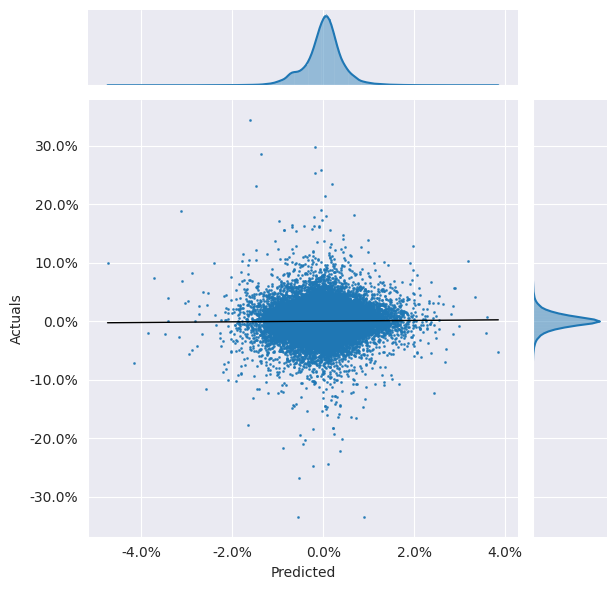

In [222]:
plot_preds_scatter(lr_predictions)

#### Daily IC Distribution

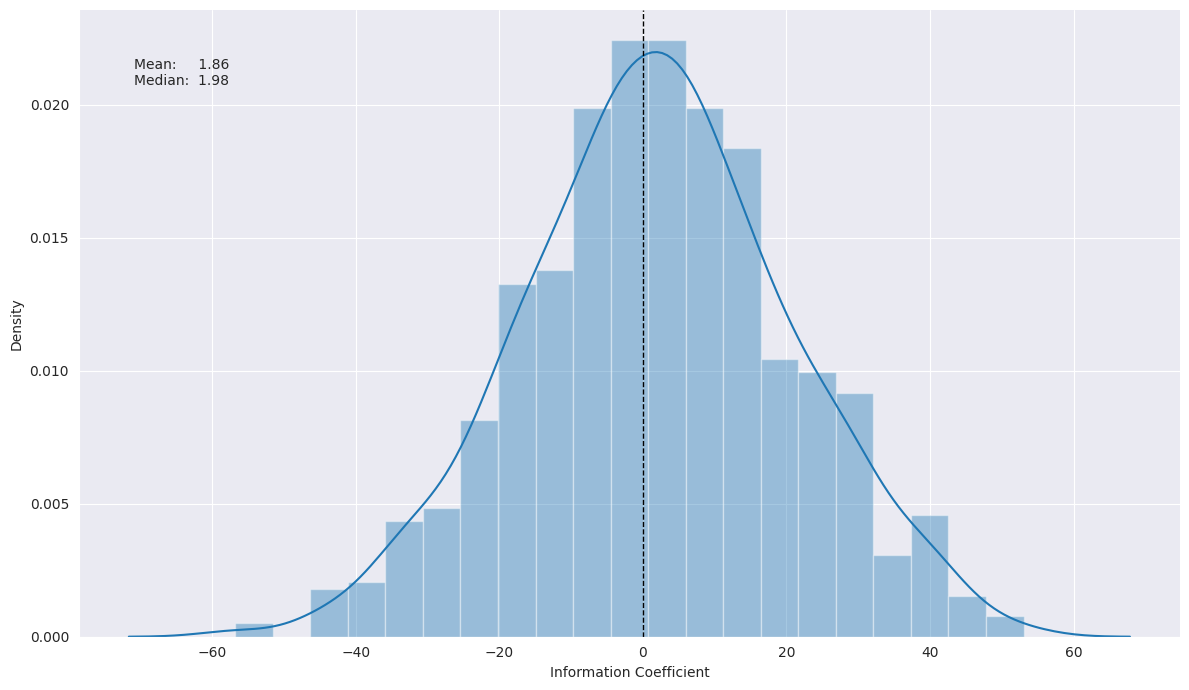

In [223]:
plot_ic_distribution(lr_scores)

#### Rolling Daily IC

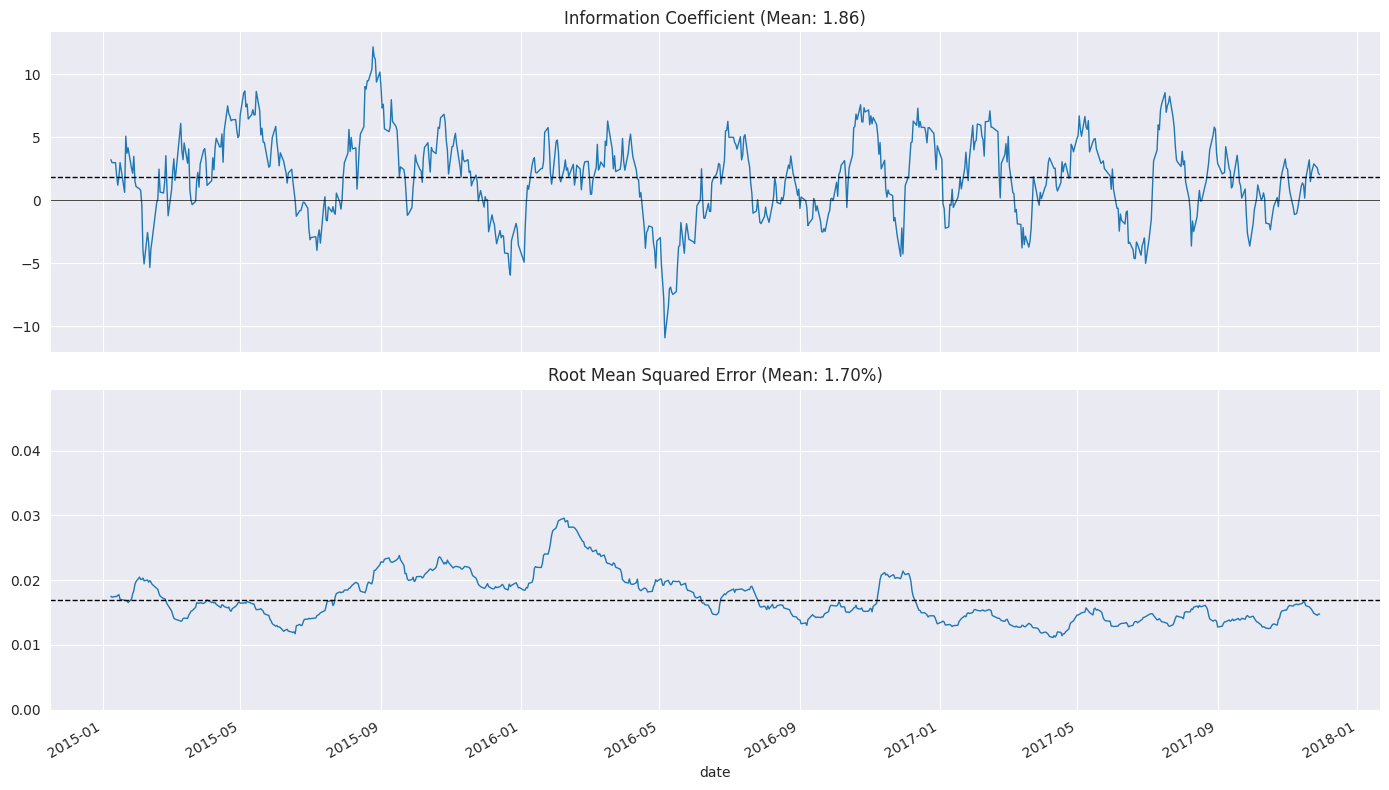

In [224]:
plot_rolling_ic(lr_scores)

## Ridge Regression

### Define cross-validation parameters

In [225]:
ridge_alphas = np.logspace(-4, 4, 9)
ridge_alphas = sorted(list(ridge_alphas) + list(ridge_alphas * 5))

In [226]:
n_splits = int(3 * YEAR/test_period_length)
train_period_length = 63
test_period_length = 10
lookahead = 1

cv = MultipleTimeSeriesCV(n_splits=n_splits,
                          test_period_length=test_period_length,
                          lookahead=lookahead,
                          train_period_length=train_period_length)

### Run cross-validation

In [227]:
target = f'target_{lookahead}d'

X = X.drop([c for c in X.columns if 'year' in c], axis=1)

In [228]:
%%time
ridge_coeffs, ridge_scores, ridge_predictions = {}, [], []

for alpha in ridge_alphas:
    print(alpha, end=' ', flush=True)
    start = time()
    model = Ridge(alpha=alpha,
                  fit_intercept=False,
                  random_state=42)

    pipe = Pipeline([
        ('scaler', StandardScaler()),
        ('model', model)])

    coeffs = []
    for i, (train_idx, test_idx) in enumerate(cv.split(X), 1):
        X_train, y_train, = X.iloc[train_idx], y[target].iloc[train_idx]
        X_test, y_test = X.iloc[test_idx], y[target].iloc[test_idx]

        pipe.fit(X=X_train, y=y_train)
        y_pred = pipe.predict(X_test)

        preds = y_test.to_frame('actuals').assign(predicted=y_pred)
        preds_by_day = preds.groupby(level='date')
        scores = pd.concat([preds_by_day.apply(lambda x: spearmanr(x.predicted,
                                                                   x.actuals)[0] * 100)
                            .to_frame('ic'),
                            preds_by_day.apply(lambda x: np.sqrt(mean_squared_error(y_pred=x.predicted,
                                                                                    y_true=x.actuals)))
                            .to_frame('rmse')], axis=1)

        ridge_scores.append(scores.assign(alpha=alpha))
        ridge_predictions.append(preds.assign(alpha=alpha))

        coeffs.append(pipe.named_steps['model'].coef_)
    ridge_coeffs[alpha] = np.mean(coeffs, axis=0)

print('\n')

0.0001 0.0005 0.001 0.005 0.01 0.05 0.1 0.5 1.0 5.0 10.0 50.0 100.0 500.0 1000.0 5000.0 10000.0 50000.0 

CPU times: user 1min 23s, sys: 1min, total: 2min 23s
Wall time: 1min 45s


### Persist results

In [229]:
ridge_scores = pd.concat(ridge_scores)
ridge_scores.to_hdf('/content/data.h5', 'ridge/scores')

ridge_coeffs = pd.DataFrame(ridge_coeffs, index=X.columns).T
ridge_coeffs.to_hdf('/content/data.h5', 'ridge/coeffs')

ridge_predictions = pd.concat(ridge_predictions)
ridge_predictions.to_hdf('/content/data.h5', 'ridge/predictions')

In [230]:
ridge_scores = pd.read_hdf('/content/data.h5', 'ridge/scores')
ridge_coeffs = pd.read_hdf('/content/data.h5', 'ridge/coeffs')
ridge_predictions = pd.read_hdf('/content/data.h5', 'ridge/predictions')

### Evaluate Ridge Results

In [231]:
ridge_r, ridge_p = spearmanr(ridge_predictions.actuals, ridge_predictions.predicted)
print(f'Information Coefficient (overall): {ridge_r:.3%} (p-value: {ridge_p:.4%})')

Information Coefficient (overall): 1.551% (p-value: 0.0000%)


In [232]:
ridge_scores.groupby('alpha').ic.describe()

,count,mean,std,min,25%,50%,75%,max
alpha,,,,,,,,
0.00,750.00,1.86,18.57,-56.79,-10.01,1.98,14.10,53.02
0.00,750.00,1.86,18.57,-56.79,-10.01,1.98,14.10,53.02
0.00,750.00,1.86,18.57,-56.79,-10.01,1.98,14.10,53.02
0.01,750.00,1.86,18.57,-56.79,-10.01,1.98,14.10,53.02
0.01,750.00,1.86,18.57,-56.79,-10.01,1.98,14.10,53.02
0.05,750.00,1.86,18.57,-56.79,-10.01,1.98,14.10,53.02
0.10,750.00,1.86,18.57,-56.79,-10.01,1.98,14.10,53.02
0.50,750.00,1.86,18.57,-56.84,-10.00,1.97,14.12,53.03
1.00,750.00,1.86,18.57,-56.84,-10.00,1.97,14.11,53.16


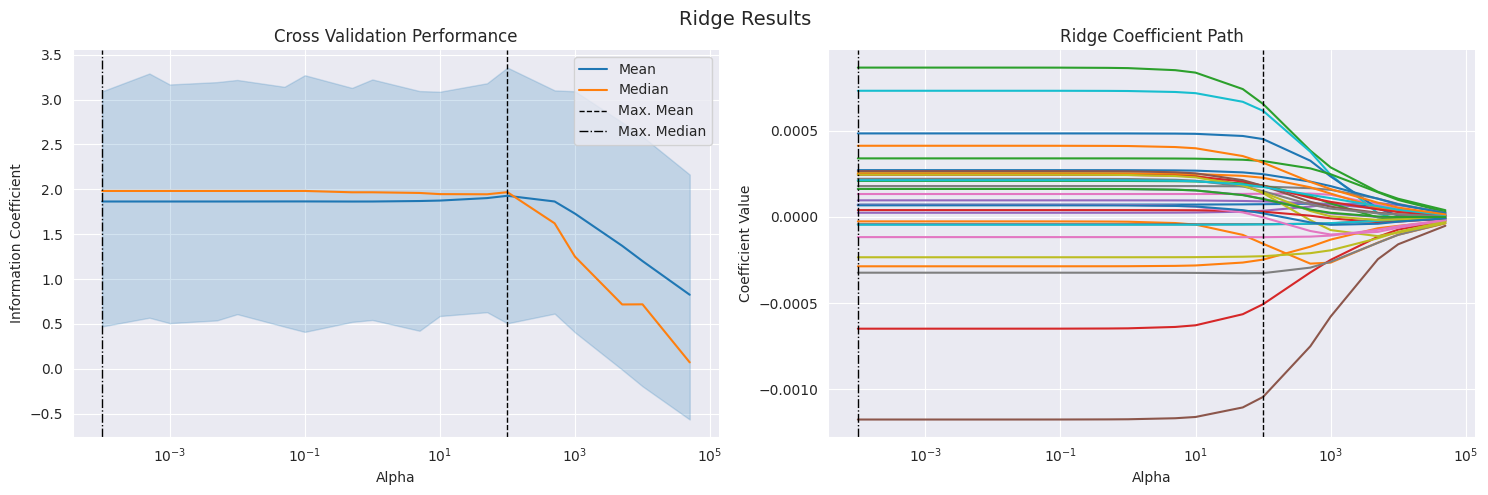

In [233]:
fig, axes = plt.subplots(ncols=2, sharex=True, figsize=(15, 5))

scores_by_alpha = ridge_scores.groupby('alpha').ic.agg(['mean', 'median'])
best_alpha_mean = scores_by_alpha['mean'].idxmax()
best_alpha_median = scores_by_alpha['median'].idxmax()

ax = sns.lineplot(x='alpha',
                  y='ic',
                  data=ridge_scores,
                  estimator=np.mean,
                  label='Mean',
                  ax=axes[0])

scores_by_alpha['median'].plot(logx=True,
                               ax=axes[0],
                               label='Median')

axes[0].axvline(best_alpha_mean,
                ls='--',
                c='k',
                lw=1,
                label='Max. Mean')
axes[0].axvline(best_alpha_median,
                ls='-.',
                c='k',
                lw=1,
                label='Max. Median')
axes[0].legend()
axes[0].set_xscale('log')
axes[0].set_xlabel('Alpha')
axes[0].set_ylabel('Information Coefficient')
axes[0].set_title('Cross Validation Performance')

ridge_coeffs.plot(logx=True,
                  legend=False,
                  ax=axes[1],
                  title='Ridge Coefficient Path')

axes[1].axvline(best_alpha_mean,
                ls='--',
                c='k',
                lw=1,
                label='Max. Mean')
axes[1].axvline(best_alpha_median,
                ls='-.',
                c='k',
                lw=1,
                label='Max. Median')
axes[1].set_xlabel('Alpha')
axes[1].set_ylabel('Coefficient Value')

fig.suptitle('Ridge Results', fontsize=14)
sns.despine()
fig.tight_layout()
fig.subplots_adjust(top=.9)

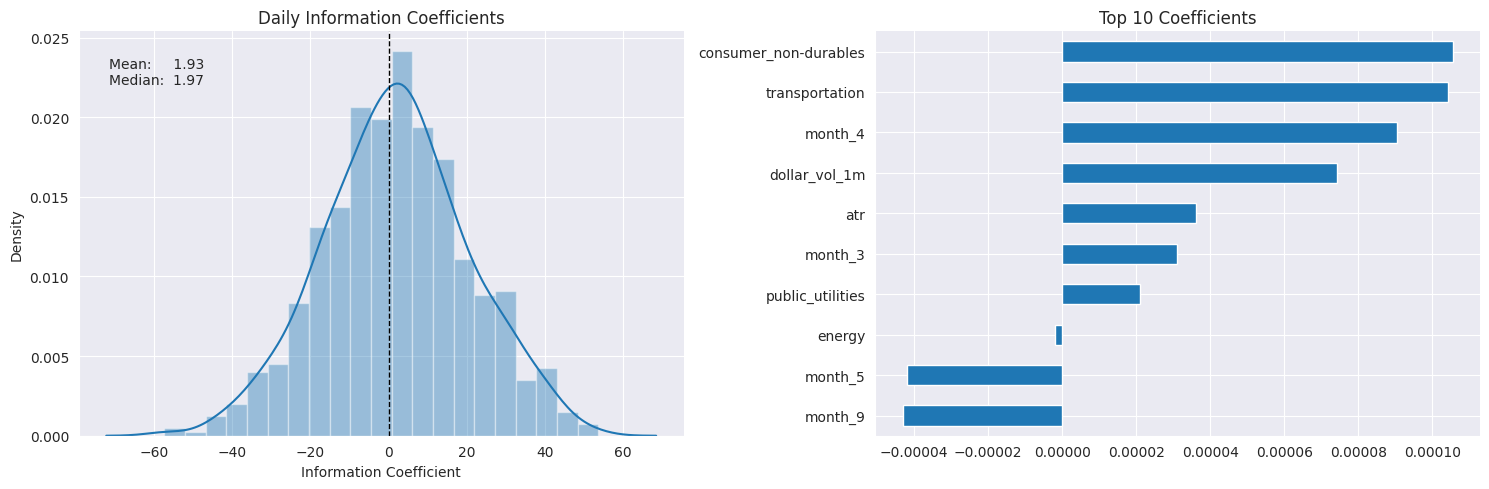

In [234]:
best_alpha = ridge_scores.groupby('alpha').ic.mean().idxmax()
fig, axes = plt.subplots(ncols=2, figsize=(15, 5))
plot_ic_distribution(ridge_scores[ridge_scores.alpha == best_alpha],
                     ax=axes[0])
axes[0].set_title('Daily Information Coefficients')
top_coeffs = ridge_coeffs.loc[best_alpha].abs().sort_values().head(10).index
top_coeffs.tolist()
ridge_coeffs.loc[best_alpha, top_coeffs].sort_values().plot.barh(ax=axes[1],
                                                                 title='Top 10 Coefficients')
sns.despine()
fig.tight_layout()

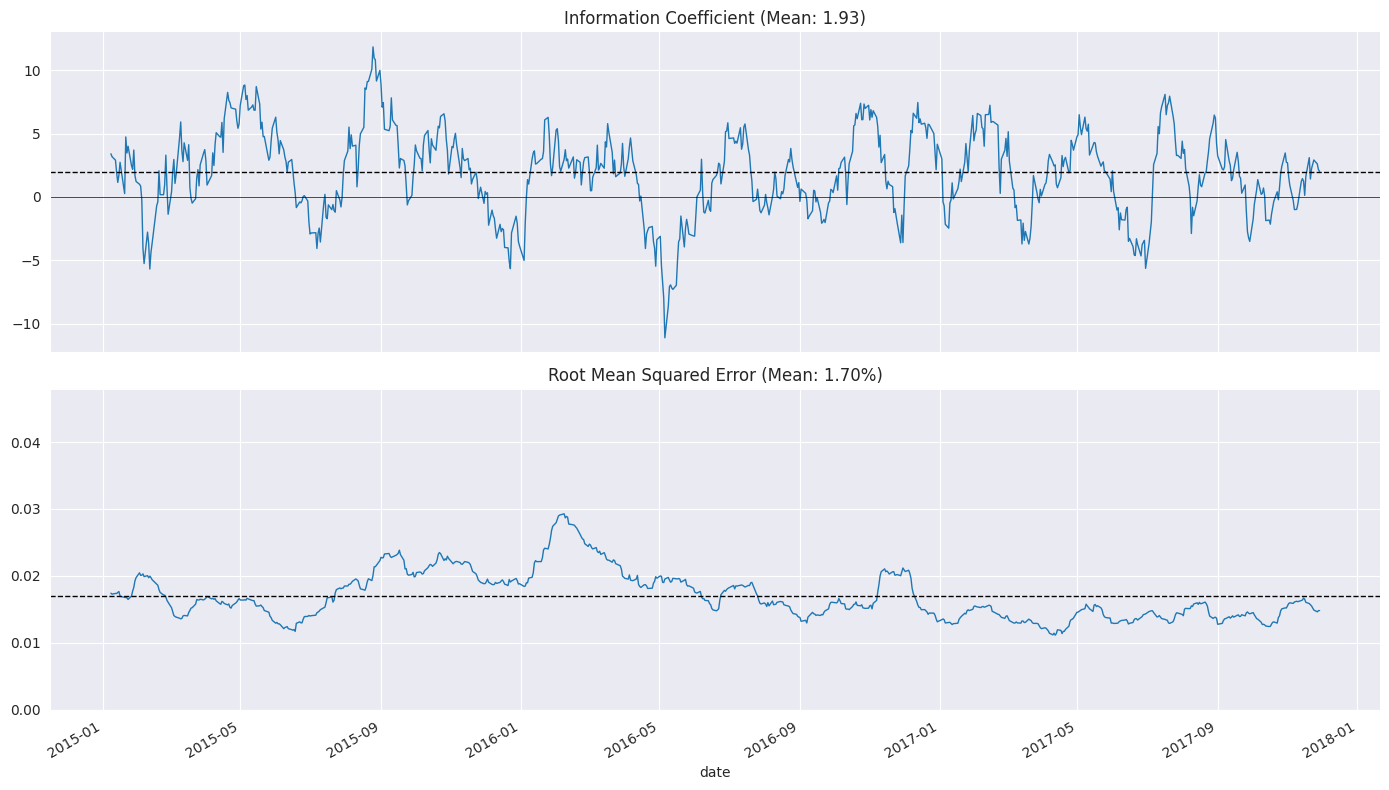

In [235]:
plot_rolling_ic(ridge_scores[ridge_scores.alpha==best_alpha])

## Lasso CV

### Define cross-validation parameters

In [236]:
lasso_alphas = np.logspace(-10, -3, 8)

In [237]:
train_period_length = 63
test_period_length = 10
YEAR = 252
n_splits = int(3 * YEAR / test_period_length) # three years
lookahead = 1

In [238]:
cv = MultipleTimeSeriesCV(n_splits=n_splits,
                          test_period_length=test_period_length,
                          lookahead=lookahead,
                          train_period_length=train_period_length)

### Run cross-validation with Lasso regression

In [239]:
target = f'target_{lookahead}d'

scaler = StandardScaler()
X = X.drop([c for c in X.columns if 'year' in c], axis=1)

In [240]:
%%time

lasso_coeffs, lasso_scores, lasso_predictions = {}, [], []
for alpha in lasso_alphas:
    print(alpha, end=' ', flush=True)
    model = Lasso(alpha=alpha,
                  fit_intercept=False,  # StandardScaler centers data
                  random_state=42,
                  tol=1e-3,
                  max_iter=1000,
                  warm_start=True,
                  selection='random')

    pipe = Pipeline([
        ('scaler', StandardScaler()),
        ('model', model)])
    coeffs = []
    for i, (train_idx, test_idx) in enumerate(cv.split(X), 1):
        t = time()
        X_train, y_train, = X.iloc[train_idx], y[target].iloc[train_idx]
        X_test, y_test = X.iloc[test_idx], y[target].iloc[test_idx]

        pipe.fit(X=X_train, y=y_train)
        y_pred = pipe.predict(X_test)

        preds = y_test.to_frame('actuals').assign(predicted=y_pred)
        preds_by_day = preds.groupby(level='date')
        scores = pd.concat([preds_by_day.apply(lambda x: spearmanr(x.predicted,
                                                                   x.actuals)[0] * 100)
                            .to_frame('ic'),
                            preds_by_day.apply(lambda x: np.sqrt(mean_squared_error(y_pred=x.predicted,
                                                                                    y_true=x.actuals)))
                            .to_frame('rmse')],
                           axis=1)

        lasso_scores.append(scores.assign(alpha=alpha))
        lasso_predictions.append(preds.assign(alpha=alpha))

        coeffs.append(pipe.named_steps['model'].coef_)

    lasso_coeffs[alpha] = np.mean(coeffs, axis=0)

1e-10 1e-09 1e-08 1e-07 1e-06 1e-05 0.0001 0.001 CPU times: user 2min 6s, sys: 1min 51s, total: 3min 58s
Wall time: 3min 7s


### Persist results

In [243]:
lasso_scores = pd.concat(lasso_scores)
lasso_scores.to_hdf('/content/data.h5', 'lasso/scores')

lasso_coeffs = pd.DataFrame(lasso_coeffs, index=X.columns).T
lasso_coeffs.to_hdf('/content/data.h5', 'lasso/coeffs')

lasso_predictions = pd.concat(lasso_predictions)
lasso_predictions.to_hdf('/content/data.h5', 'lasso/predictions')

### Evaluate Lasso Results

In [244]:
best_alpha = lasso_scores.groupby('alpha').ic.mean().idxmax()
preds = lasso_predictions[lasso_predictions.alpha==best_alpha]

lasso_r, lasso_p = spearmanr(preds.actuals, preds.predicted)
print(f'Information Coefficient (overall): {lasso_r:.3%} (p-value: {lasso_p:.4%})')

Information Coefficient (overall): 3.595% (p-value: 0.0000%)


In [245]:
lasso_scores.groupby('alpha').ic.agg(['mean', 'median'])

,mean,median
alpha,,
0.00,1.86,1.98
0.00,1.86,1.98
0.00,1.86,1.98
0.00,1.87,1.97
0.00,1.88,1.96
0.00,1.94,2.19
0.00,1.58,1.01
0.00,1.03,1.77


### Lasso Coefficient Path

ValueError: ignored

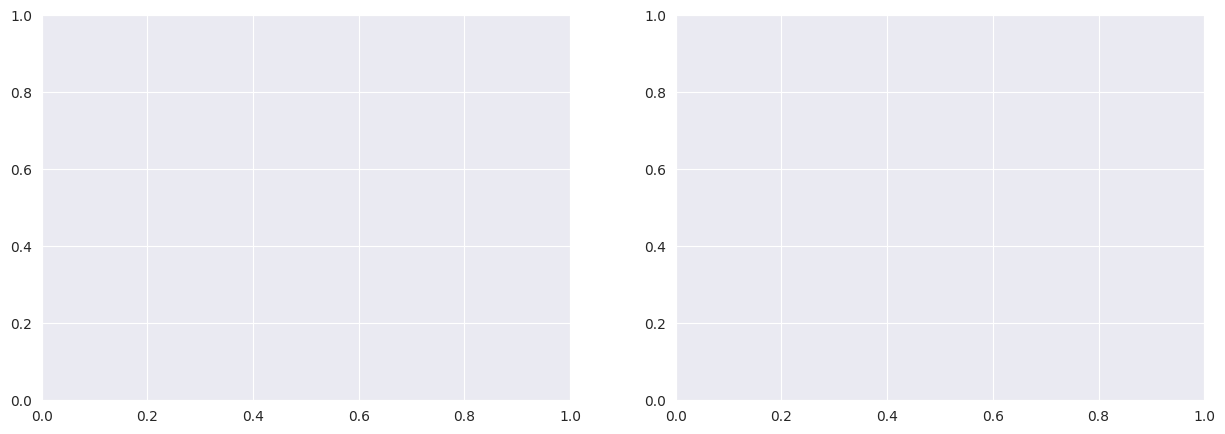

In [246]:
fig, axes = plt.subplots(ncols=2, sharex=True, figsize=(15, 5))

scores_by_alpha = lasso_scores.groupby('alpha').ic.agg(['mean', 'median'])
best_alpha_mean = scores_by_alpha['mean'].idxmax()
best_alpha_median = scores_by_alpha['median'].idxmax()

ax = sns.lineplot(x='alpha', y='ic', data=lasso_scores, estimator=np.mean, label='Mean', ax=axes[0])

scores_by_alpha['median'].plot(logx=True, ax=axes[0], label='Median')

axes[0].axvline(best_alpha_mean, ls='--', c='k', lw=1, label='Max. Mean')
axes[0].axvline(best_alpha_median, ls='-.', c='k', lw=1, label='Max. Median')
axes[0].legend()
axes[0].set_xscale('log')
axes[0].set_xlabel('Alpha')
axes[0].set_ylabel('Information Coefficient')
axes[0].set_title('Cross Validation Performance')

lasso_coeffs.plot(logx=True, legend=False, ax=axes[1], title='Lasso Coefficient Path')
axes[1].axvline(best_alpha_mean, ls='--', c='k', lw=1, label='Max. Mean')
axes[1].axvline(best_alpha_median, ls='-.', c='k', lw=1, label='Max. Median')
axes[1].set_xlabel('Alpha')
axes[1].set_ylabel('Coefficient Value')

fig.suptitle('Lasso Results', fontsize=14)
fig.tight_layout()
fig.subplots_adjust(top=.9)
sns.despine();

### Lasso IC Distribution and Top 10 Features

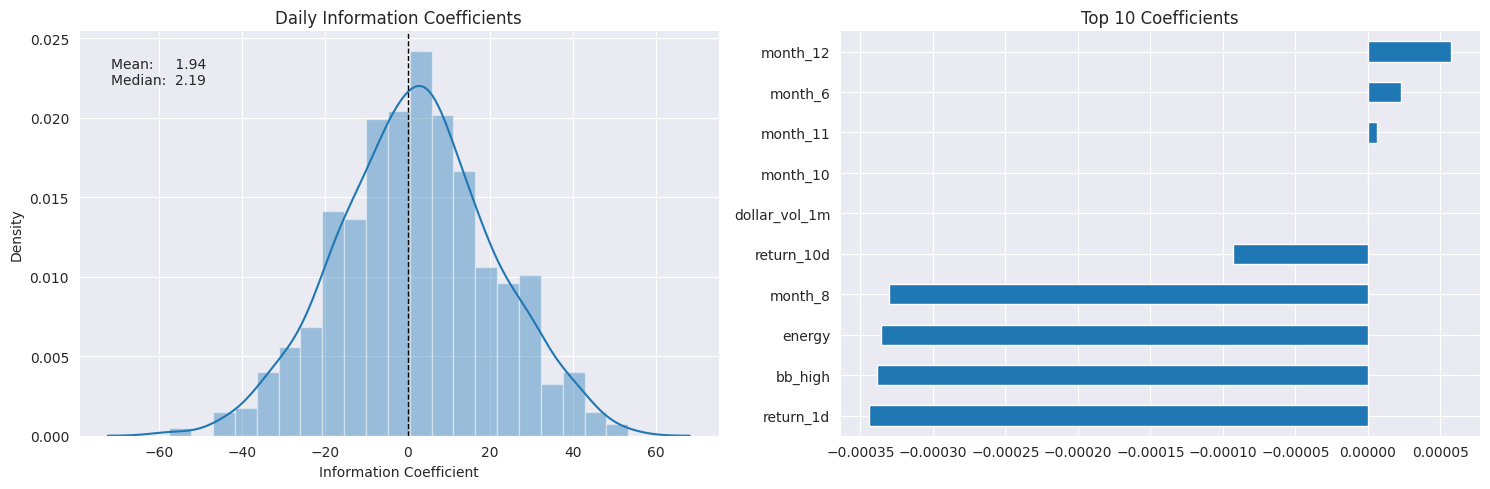

In [247]:
best_alpha = lasso_scores.groupby('alpha').ic.mean().idxmax()

fig, axes = plt.subplots(ncols=2, figsize=(15, 5))
plot_ic_distribution(lasso_scores[lasso_scores.alpha==best_alpha], ax=axes[0])
axes[0].set_title('Daily Information Coefficients')

top_coeffs = lasso_coeffs.loc[best_alpha].abs().sort_values().head(10).index
top_coeffs.tolist()
lasso_coeffs.loc[best_alpha, top_coeffs].sort_values().plot.barh(ax=axes[1], title='Top 10 Coefficients')

sns.despine()
fig.tight_layout();

## Compare results

In [248]:
best_ridge_alpha = ridge_scores.groupby('alpha').ic.mean().idxmax()
best_ridge_preds = ridge_predictions[ridge_predictions.alpha==best_ridge_alpha]
best_ridge_scores = ridge_scores[ridge_scores.alpha==best_ridge_alpha]

In [249]:
best_lasso_alpha = lasso_scores.groupby('alpha').ic.mean().idxmax()
best_lasso_preds = lasso_predictions[lasso_predictions.alpha==best_lasso_alpha]
best_lasso_scores = lasso_scores[lasso_scores.alpha==best_lasso_alpha]

In [250]:
df = pd.concat([lr_scores.assign(Model='Linear Regression'),
               best_ridge_scores.assign(Model='Ridge Regression'),
               best_lasso_scores.assign(Model='Lasso Regression')]).drop('alpha', axis=1)
df.columns = ['IC', 'RMSE', 'Model']

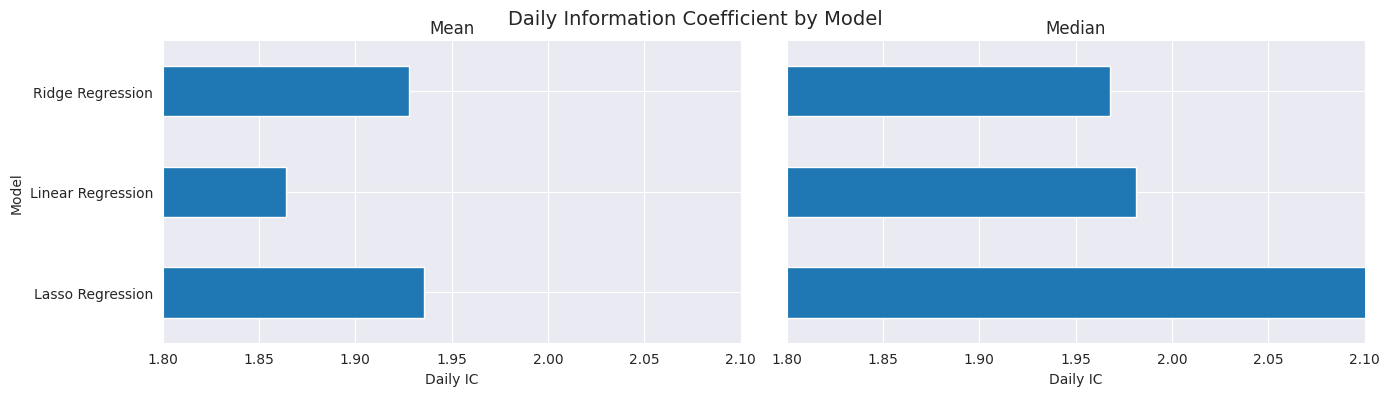

In [251]:
scores = df.groupby('Model').IC.agg(['mean', 'median'])
fig, axes = plt.subplots(ncols=2, figsize=(14,4), sharey=True, sharex=True)

scores['mean'].plot.barh(ax=axes[0], xlim=(1.85, 2), title='Mean')
scores['median'].plot.barh(ax=axes[1], xlim=(1.8, 2.1), title='Median')
axes[0].set_xlabel('Daily IC')
axes[1].set_xlabel('Daily IC')

fig.suptitle('Daily Information Coefficient by Model', fontsize=14)
sns.despine()
fig.tight_layout()
fig.subplots_adjust(top=.9)

### 예측 신호의 품질 비교
- 06_evaluating_signals_using_alphalens.ipynb
- alphalens 설치 불가

## 선형 분류

### 로지스틱 회귀 모델
- 목표 함수
- 로지스틱 함수
- 최대 우도 측정(MLE)

### statsmodels로 추론을 수행하는 방법
- 07_logistic_regression_macro_data.ipynb

# Logistic Regression with Macro Data

In [253]:
%matplotlib inline
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

In [254]:
sns.set_style('whitegrid')

## Data Set

| Variable   | Description                                  | Transformation     |
|------------|----------------------------------------------|--------------------|
| realgdp    | Real gross domestic product                  | Annual Growth Rate |
| realcons   | Real personal consumption expenditures       | Annual Growth Rate |
| realinv    | Real gross private domestic investment       | Annual Growth Rate |
| realgovt   | Real federal expenditures & gross investment | Annual Growth Rate |
| realdpi    | Real private disposable income               | Annual Growth Rate |
| m1         | M1 nominal money stock                       | Annual Growth Rate |
| tbilrate   | Monthly treasury bill rate                 | Level              |
| unemp      | Seasonally adjusted unemployment rate (%)    | Level              |
| infl       | Inflation rate                               | Level              |
| realint    |  Real interest rate                          | Level              |

In [255]:
data = pd.DataFrame(sm.datasets.macrodata.load().data)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 203 entries, 0 to 202
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   year      203 non-null    float64
 1   quarter   203 non-null    float64
 2   realgdp   203 non-null    float64
 3   realcons  203 non-null    float64
 4   realinv   203 non-null    float64
 5   realgovt  203 non-null    float64
 6   realdpi   203 non-null    float64
 7   cpi       203 non-null    float64
 8   m1        203 non-null    float64
 9   tbilrate  203 non-null    float64
 10  unemp     203 non-null    float64
 11  pop       203 non-null    float64
 12  infl      203 non-null    float64
 13  realint   203 non-null    float64
dtypes: float64(14)
memory usage: 22.3 KB


In [256]:
data.head()

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
0,"1,959.00",1.00,"2,710.35","1,707.40",286.90,470.05,"1,886.90",28.98,139.70,2.82,5.80,177.15,0.00,0.00
1,"1,959.00",2.00,"2,778.80","1,733.70",310.86,481.30,"1,919.70",29.15,141.70,3.08,5.10,177.83,2.34,0.74
2,"1,959.00",3.00,"2,775.49","1,751.80",289.23,491.26,"1,916.40",29.35,140.50,3.82,5.30,178.66,2.74,1.09
3,"1,959.00",4.00,"2,785.20","1,753.70",299.36,484.05,"1,931.30",29.37,140.00,4.33,5.60,179.39,0.27,4.06
4,"1,960.00",1.00,"2,847.70","1,770.50",331.72,462.20,"1,955.50",29.54,139.60,3.50,5.20,180.01,2.31,1.19


## Data Prep

To obtain a binary target variable, we compute the 20-quarter rolling average of the annual growth rate of quarterly real GDP. We then assign 1 if current growth exceeds the moving average and 0 otherwise. Finally, we shift the indicator variables to align next quarter's outcome with the current quarter.

In [257]:
data['growth_rate'] = data.realgdp.pct_change(4)
data['target'] = (data.growth_rate > data.growth_rate.rolling(20).mean()).astype(int).shift(-1)
data.quarter = data.quarter.astype(int)

In [258]:
data.target.value_counts()

0.00    112
1.00     90
Name: target, dtype: int64

In [259]:
data.tail()

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint,growth_rate,target
198,"2,008.00",3,"13,324.60","9,267.70","1,990.69",991.55,"9,838.30",216.89,"1,474.70",1.17,6.00,305.27,-3.16,4.33,0.00,0.00
199,"2,008.00",4,"13,141.92","9,195.30","1,857.66","1,007.27","9,920.40",212.17,"1,576.50",0.12,6.90,305.95,-8.79,8.91,-0.02,0.00
200,"2,009.00",1,"12,925.41","9,209.20","1,558.49",996.29,"9,926.40",212.67,"1,592.80",0.22,8.10,306.55,0.94,-0.71,-0.03,0.00
201,"2,009.00",2,"12,901.50","9,189.00","1,456.68","1,023.53","10,077.50",214.47,"1,653.60",0.18,9.20,307.23,3.37,-3.19,-0.04,0.00
202,"2,009.00",3,"12,990.34","9,256.00","1,486.40","1,044.09","10,040.60",216.38,"1,673.90",0.12,9.60,308.01,3.56,-3.44,-0.03,NaN


In [260]:
pct_cols = ['realcons', 'realinv', 'realgovt', 'realdpi', 'm1']
drop_cols = ['year', 'realgdp', 'pop', 'cpi', 'growth_rate']
data.loc[:, pct_cols] = data.loc[:, pct_cols].pct_change(4)

In [261]:
data = pd.get_dummies(data.drop(drop_cols, axis=1), columns=['quarter'], drop_first=True).dropna()

In [262]:
data.head()

,realcons,realinv,realgovt,realdpi,m1,tbilrate,unemp,infl,realint,target,quarter_2,quarter_3,quarter_4
4,0.04,0.16,-0.02,0.04,-0.00,3.50,5.20,2.31,1.19,0.00,0,0,0
5,0.03,-0.04,-0.04,0.02,-0.01,2.68,5.20,0.14,2.55,0.00,1,0,0
6,0.02,0.02,-0.03,0.03,0.00,2.36,5.60,2.70,-0.34,0.00,0,1,0
7,0.02,-0.13,-0.02,0.02,0.01,2.29,6.30,1.21,1.08,0.00,0,0,1
8,0.01,-0.20,0.03,0.01,0.02,2.37,6.80,-0.40,2.77,0.00,0,0,0


In [263]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 198 entries, 4 to 201
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   realcons   198 non-null    float64
 1   realinv    198 non-null    float64
 2   realgovt   198 non-null    float64
 3   realdpi    198 non-null    float64
 4   m1         198 non-null    float64
 5   tbilrate   198 non-null    float64
 6   unemp      198 non-null    float64
 7   infl       198 non-null    float64
 8   realint    198 non-null    float64
 9   target     198 non-null    float64
 10  quarter_2  198 non-null    uint8  
 11  quarter_3  198 non-null    uint8  
 12  quarter_4  198 non-null    uint8  
dtypes: float64(10), uint8(3)
memory usage: 17.6 KB


We use an intercept and convert the quarter values to dummy variables and train the logistic regression model as follows:

This produces the following summary for our model with 198 observations and 13 variables, including intercept:
The summary indicates that the model has been trained using maximum likelihood and provides the maximized value of the log-likelihood function at -67.9.

In [264]:
model = sm.Logit(data.target, sm.add_constant(data.drop('target', axis=1)))
result = model.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.342965
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 target   No. Observations:                  198
Model:                          Logit   Df Residuals:                      185
Method:                           MLE   Df Model:                           12
Date:                Sat, 24 Jun 2023   Pseudo R-squ.:                  0.5022
Time:                        16:58:12   Log-Likelihood:                -67.907
converged:                       True   LL-Null:                       -136.42
Covariance Type:            nonrobust   LLR p-value:                 2.375e-23
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -8.5881      1.908     -4.502      0.000     -12.327      -4.849
realcons     130.1446     26.633      4.887      0.000      77.945     182.344
realinv       18.8414      4.053      4.648      0.000      10.897      26.786
realgovt     -19.0318      6.010     -3.166      0.002     -30.812      -7.252
realdpi      -52.2473     19.912     -2.624      0.009     -91.275     -13.220
m1            -1.3462      6.177     -0.218      0.827     -13.453      10.761
tbilrate      60.8607     44.350      1.372      0.170     -26.063     147.784
unemp          0.9487      0.249      3.818      0.000       0.462       1.436
infl         -60.9647     44.362     -1.374      0.169    -147.913      25.984
realint      -61.0453     44.359     -1.376      0.169    -147.987      25.896
quarter_2      0.1128      0.618      0.182      0.855      -1.099       1.325
quarter_3     -0.1991      0.609     -0.327      0.744      -1.393       0.995
quarter_4      0.0007      0.608      0.001      0.999      -1.191       1.192
==============================================================================
"""

LL-Null 값인 -136.42는 절편만 포함된 상태에서 최대화된 로그-우도 함수의 결과입니다. 이 값은 의사 R2 통계량과 로그-우도비(LLR) 검정의 기초가 됩니다.

의사 R2 통계량은 최소 제곱법에서 제공되는 익숙한 R2의 대체물입니다. 이는 다음과 같이 널 모델 m0와 전체 모델 m1의 최대화된 로그-우도 함수의 비율을 기반으로 계산됩니다:

값은 0부터 시작하여 모델이 우도를 개선하지 않을 때부터 1까지 변동하며, 모델이 완벽하게 적합되고 로그-우도가 0에서 최대화될 때 1에 도달합니다. 따라서 높은 값은 더 좋은 적합을 나타냅니다.

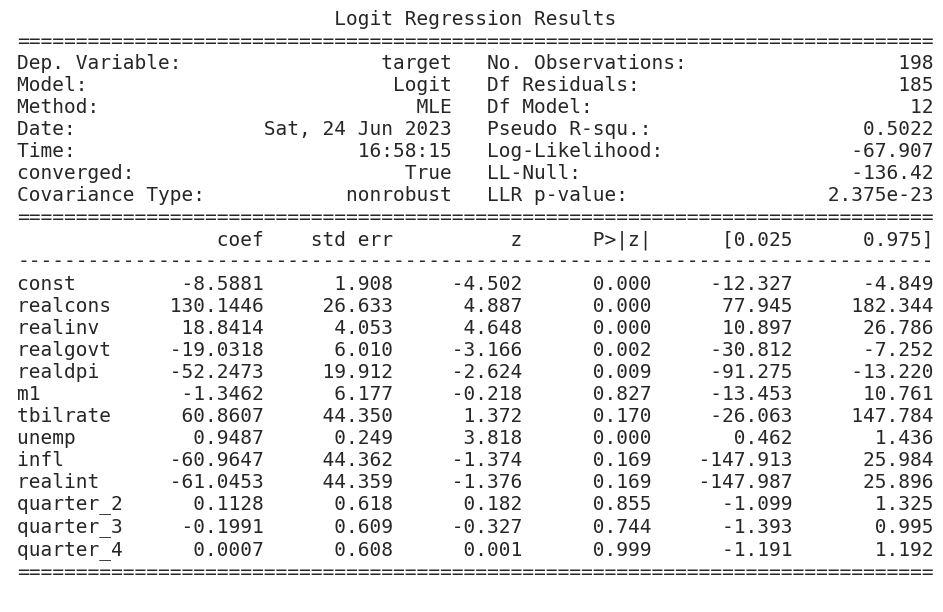

In [265]:
plt.rc('figure', figsize=(12, 7))
plt.text(0.01, 0.05, str(result.summary()), {'fontsize': 14}, fontproperties = 'monospace')
plt.axis('off')
plt.tight_layout()
plt.subplots_adjust(left=0.2, right=0.8, top=0.8, bottom=0.1)
plt.savefig('logistic_example.png', bbox_inches='tight', dpi=300);

- 08_predicting_price_movements_with_logistic_regression.ipynb

# Predicting stock price moves with Logistic Regression

## Imports & Settings

In [266]:
import warnings
warnings.filterwarnings('ignore')

In [267]:
from pathlib import Path
import sys, os
from time import time

import pandas as pd
import numpy as np

from scipy.stats import spearmanr

from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

import seaborn as sns
import matplotlib.pyplot as plt

In [274]:
!pip install --upgrade utils

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# sys.path.insert(1, os.path.join(sys.path[0], '..'))
# from utils import MultipleTimeSeriesCV

In [276]:
sns.set_style('darkgrid')
idx = pd.IndexSlice

In [277]:
YEAR = 252

## Load Data

In [278]:
with pd.HDFStore('/content/data.h5') as store:
    data = (store['model_data']
            .dropna()
            .drop(['open', 'close', 'low', 'high'], axis=1))
data = data.drop([c for c in data.columns if 'year' in c or 'lag' in c], axis=1)

### Select Investment Universe

In [279]:
data = data[data.dollar_vol_rank<100]

### Create Model Data

In [280]:
y = data.filter(like='target')
X = data.drop(y.columns, axis=1)
X = X.drop(['dollar_vol', 'dollar_vol_rank', 'volume', 'consumer_durables'], axis=1)

## Logistic Regression

### Define cross-validation parameters

In [281]:
train_period_length = 63
test_period_length = 10
lookahead =1
n_splits = int(3 * YEAR/test_period_length)

cv = MultipleTimeSeriesCV(n_splits=n_splits,
                          test_period_length=test_period_length,
                          lookahead=lookahead,
                          train_period_length=train_period_length)

In [282]:
target = f'target_{lookahead}d'

In [283]:
y.loc[:, 'label'] = (y[target] > 0).astype(int)
y.label.value_counts()

1    56486
0    53189
Name: label, dtype: int64

In [284]:
Cs = np.logspace(-5, 5, 11)

In [285]:
cols = ['C', 'date', 'auc', 'ic', 'pval']

### Run cross-validation

In [286]:
%%time
log_coeffs, log_scores, log_predictions = {}, [], []
for C in Cs:
    print(C)
    model = LogisticRegression(C=C,
                               fit_intercept=True,
                               random_state=42,
                               n_jobs=-1)

    pipe = Pipeline([
        ('scaler', StandardScaler()),
        ('model', model)])
    ics = aucs = 0
    start = time()
    coeffs = []
    for i, (train_idx, test_idx) in enumerate(cv.split(X), 1):
        X_train, y_train, = X.iloc[train_idx], y.label.iloc[train_idx]
        pipe.fit(X=X_train, y=y_train)
        X_test, y_test = X.iloc[test_idx], y.label.iloc[test_idx]
        actuals = y[target].iloc[test_idx]
        if len(y_test) < 10 or len(np.unique(y_test)) < 2:
            continue
        y_score = pipe.predict_proba(X_test)[:, 1]

        auc = roc_auc_score(y_score=y_score, y_true=y_test)
        actuals = y[target].iloc[test_idx]
        ic, pval = spearmanr(y_score, actuals)

        log_predictions.append(y_test.to_frame('labels').assign(
            predicted=y_score, C=C, actuals=actuals))
        date = y_test.index.get_level_values('date').min()
        log_scores.append([C, date, auc, ic * 100, pval])
        coeffs.append(pipe.named_steps['model'].coef_)
        ics += ic
        aucs += auc
        if i % 10 == 0:
            print(f'\t{time()-start:5.1f} | {i:03} | {ics/i:>7.2%} | {aucs/i:>7.2%}')

    log_coeffs[C] = np.mean(coeffs, axis=0).squeeze()

1e-05
	 13.8 | 010 |  -0.31% |  50.42%
	 24.9 | 020 |   1.89% |  51.83%
	 35.8 | 030 |   2.84% |  52.01%
	 46.4 | 040 |   3.29% |  51.98%
	 57.1 | 050 |   3.97% |  52.44%
	 67.8 | 060 |   3.96% |  52.27%
	 78.5 | 070 |   4.73% |  52.59%
0.0001
	 10.9 | 010 |  -0.06% |  50.62%
	 22.1 | 020 |   2.23% |  52.01%
	 32.8 | 030 |   3.20% |  52.26%
	 43.4 | 040 |   3.34% |  52.08%
	 54.1 | 050 |   4.02% |  52.53%
	 64.7 | 060 |   4.02% |  52.33%
	 75.4 | 070 |   4.83% |  52.67%
0.001
	 10.6 | 010 |   0.42% |  50.96%
	 21.4 | 020 |   2.53% |  52.14%
	 32.1 | 030 |   3.58% |  52.48%
	 42.8 | 040 |   3.17% |  52.07%
	 53.6 | 050 |   3.83% |  52.49%
	 64.3 | 060 |   4.03% |  52.33%
	 75.1 | 070 |   4.88% |  52.70%
0.01
	 10.9 | 010 |   0.68% |  51.13%
	 21.7 | 020 |   2.39% |  51.97%
	 32.5 | 030 |   3.64% |  52.41%
	 43.3 | 040 |   3.12% |  51.94%
	 54.1 | 050 |   3.92% |  52.46%
	 64.9 | 060 |   4.16% |  52.30%
	 75.7 | 070 |   4.91% |  52.64%
0.1
	 11.1 | 010 |   0.65% |  51.11%
	 22.0 | 020 | 

### Evaluate Results

In [287]:
log_scores = pd.DataFrame(log_scores, columns=cols)
log_scores.to_hdf('/content/data.h5', 'logistic/scores')

log_coeffs = pd.DataFrame(log_coeffs, index=X.columns).T
log_coeffs.to_hdf('/content/data.h5', 'logistic/coeffs')

log_predictions = pd.concat(log_predictions)
log_predictions.to_hdf('/content/data.h5', 'logistic/predictions')

In [288]:
log_scores = pd.read_hdf('/content/data.h5', 'logistic/scores')

In [289]:
log_scores.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 825 entries, 0 to 824
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   C       825 non-null    float64       
 1   date    825 non-null    datetime64[ns]
 2   auc     825 non-null    float64       
 3   ic      825 non-null    float64       
 4   pval    825 non-null    float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 38.7 KB


In [290]:
log_scores.groupby('C').auc.describe()

,count,mean,std,min,25%,50%,75%,max
C,,,,,,,,
0.00,75.00,0.52,0.04,0.43,0.50,0.52,0.55,0.63
0.00,75.00,0.53,0.04,0.44,0.50,0.52,0.55,0.64
0.00,75.00,0.53,0.04,0.44,0.50,0.52,0.55,0.64
0.01,75.00,0.53,0.04,0.44,0.50,0.52,0.55,0.64
0.10,75.00,0.52,0.04,0.43,0.50,0.52,0.55,0.62
1.00,75.00,0.52,0.04,0.42,0.50,0.52,0.55,0.62
10.00,75.00,0.52,0.04,0.42,0.50,0.52,0.55,0.62
100.00,75.00,0.52,0.04,0.42,0.50,0.52,0.55,0.62
"1,000.00",75.00,0.52,0.04,0.42,0.50,0.52,0.55,0.62


### Plot Validation Scores

In [291]:
def plot_ic_distribution(df, ax=None):
    if ax is not None:
        sns.distplot(df.ic, ax=ax)
    else:
        ax = sns.distplot(df.ic)
    mean, median = df.ic.mean(), df.ic.median()
    ax.axvline(0, lw=1, ls='--', c='k')
    ax.text(x=.05, y=.9, s=f'Mean: {mean:8.2f}\nMedian: {median:5.2f}',
            horizontalalignment='left',
            verticalalignment='center',
            transform=ax.transAxes)
    ax.set_xlabel('Information Coefficient')
    sns.despine()
    plt.tight_layout()

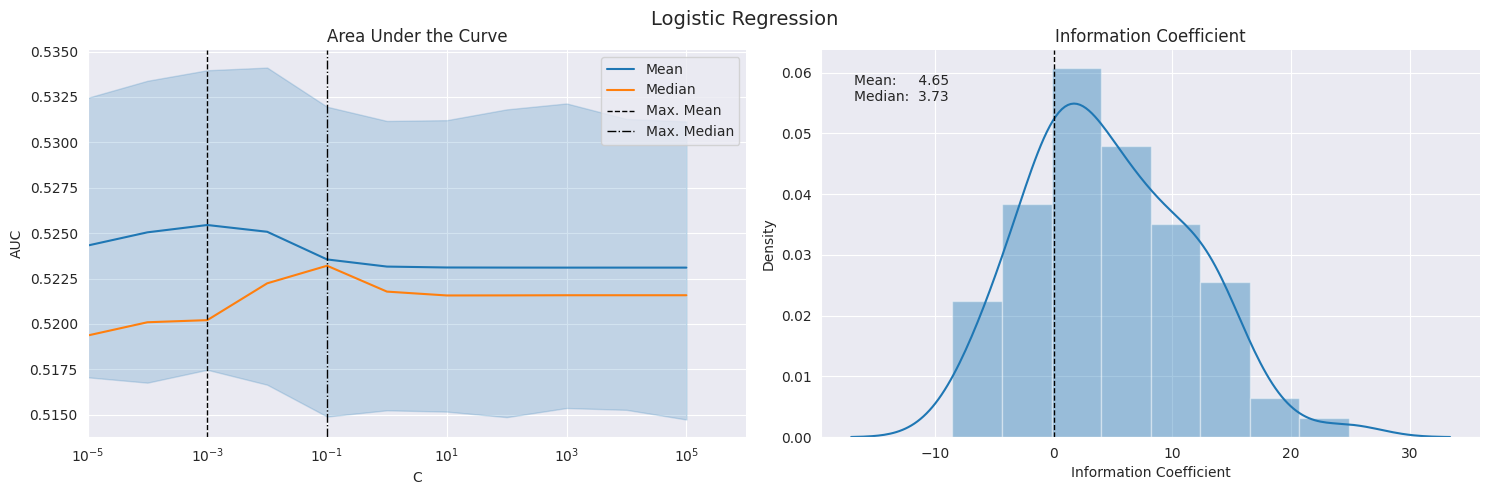

In [292]:
fig, axes= plt.subplots(ncols=2, figsize=(15, 5))

sns.lineplot(x='C', y='auc', data=log_scores, estimator=np.mean, label='Mean', ax=axes[0])
by_alpha = log_scores.groupby('C').auc.agg(['mean', 'median'])
best_auc = by_alpha['mean'].idxmax()
by_alpha['median'].plot(logx=True, ax=axes[0], label='Median', xlim=(10e-6, 10e5))
axes[0].axvline(best_auc, ls='--', c='k', lw=1, label='Max. Mean')
axes[0].axvline(by_alpha['median'].idxmax(), ls='-.', c='k', lw=1, label='Max. Median')
axes[0].legend()
axes[0].set_ylabel('AUC')
axes[0].set_xscale('log')
axes[0].set_title('Area Under the Curve')

plot_ic_distribution(log_scores[log_scores.C==best_auc], ax=axes[1])
axes[1].set_title('Information Coefficient')

fig.suptitle('Logistic Regression', fontsize=14)
sns.despine()
fig.tight_layout()
fig.subplots_adjust(top=.9);